## Import Libraries and dataset

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import datetime
from sklearn.preprocessing import OneHotEncoder
import category_encoders as ce
import seaborn as sns
import folium
from folium.plugins import HeatMap
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

import warnings

# Filter out FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
train_df = pd.read_csv('fraudTrain.csv')

## EDA

### Understanding Data

In [3]:
train_df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [4]:
train_df.drop(['Unnamed: 0'],axis=1, inplace=True)

In [5]:
train_df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


#### Data structure

In [6]:
train_df.dtypes

trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [7]:
train_df.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


#### Missing value analysis

In [8]:
# Show missing values per column
# There aren't any missing data
print(train_df.isnull().sum() * 100 / train_df.shape[0])

trans_date_trans_time    0.0
cc_num                   0.0
merchant                 0.0
category                 0.0
amt                      0.0
first                    0.0
last                     0.0
gender                   0.0
street                   0.0
city                     0.0
state                    0.0
zip                      0.0
lat                      0.0
long                     0.0
city_pop                 0.0
job                      0.0
dob                      0.0
trans_num                0.0
unix_time                0.0
merch_lat                0.0
merch_long               0.0
is_fraud                 0.0
dtype: float64


#### Target distribution analysis

In [9]:
# Show the distribution of the target variable
# The distribution is very imbalanced
train_df.is_fraud.value_counts()/len(train_df)

is_fraud
0    0.994211
1    0.005789
Name: count, dtype: float64

is_fraud
0    1289169
1       7506
Name: count, dtype: int64


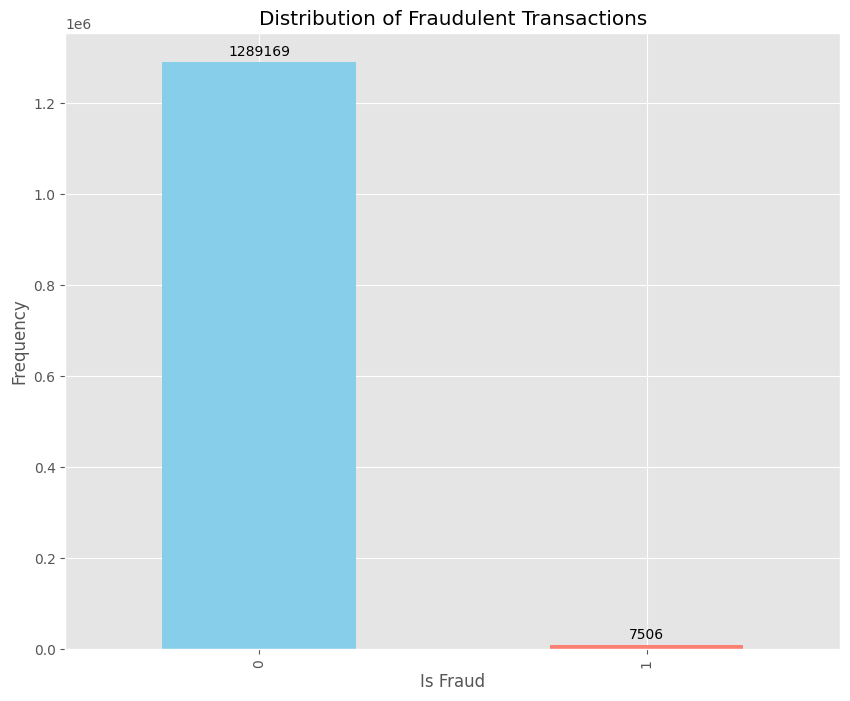

In [10]:
plt.style.use('ggplot')

value_counts = train_df['is_fraud'].value_counts()

print(value_counts)

ax = value_counts.plot(kind='bar', color=['skyblue', 'salmon'], figsize=(10, 8))

plt.title('Distribution of Fraudulent Transactions')
plt.xlabel('Is Fraud')
plt.ylabel('Frequency')

for p in ax.patches:
    # Get information to display the label above each bar
    height = p.get_height()
    x = p.get_x() + p.get_width() / 2  # x position of the text
    y = height  # y position of the text
    
    # Use ax.annotate to create the label
    ax.annotate(f'{int(height)}',  # text to display
                (x, y),  # position
                textcoords="offset points",  # how to position the text
                xytext=(0,5),  # distance from text to points (x,y)
                ha='center')  # horizontal alignment can be left, right or center


# Show the plot
plt.show()

#### Unique value analysis

In [11]:
for column in train_df.columns:
    unique_values = len(train_df[column].unique())
    print(f"Unique values in column '{column}': {unique_values}")

Unique values in column 'trans_date_trans_time': 1274791
Unique values in column 'cc_num': 983
Unique values in column 'merchant': 693
Unique values in column 'category': 14
Unique values in column 'amt': 52928
Unique values in column 'first': 352
Unique values in column 'last': 481
Unique values in column 'gender': 2
Unique values in column 'street': 983
Unique values in column 'city': 894
Unique values in column 'state': 51
Unique values in column 'zip': 970
Unique values in column 'lat': 968
Unique values in column 'long': 969
Unique values in column 'city_pop': 879
Unique values in column 'job': 494
Unique values in column 'dob': 968
Unique values in column 'trans_num': 1296675
Unique values in column 'unix_time': 1274823
Unique values in column 'merch_lat': 1247805
Unique values in column 'merch_long': 1275745
Unique values in column 'is_fraud': 2


#### Outlier analysis

Text(0.5, 0, 'Amount')

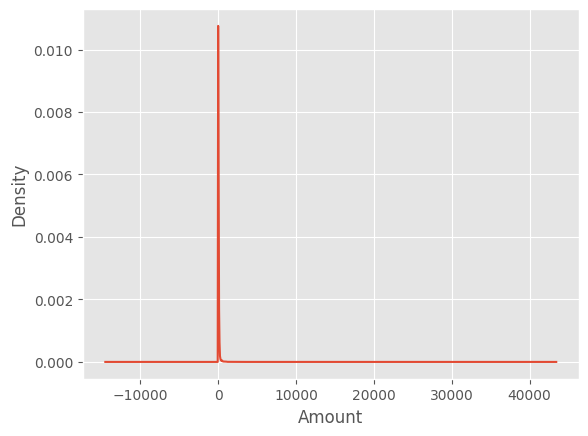

In [12]:
# Plot distribution of the amount column
# The distribution has some extreme outliers of large amounts
train_df['amt'].plot(kind='kde')
plt.xlabel('Amount')

In [13]:
train_df['amt'].describe()

count    1.296675e+06
mean     7.035104e+01
std      1.603160e+02
min      1.000000e+00
25%      9.650000e+00
50%      4.752000e+01
75%      8.314000e+01
max      2.894890e+04
Name: amt, dtype: float64

In [14]:
# Examine the quantiles of the amount column
quantiles = [0.5, 0.55,  0.6,0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 0.97, 0.98, 0.99]
for quantile in quantiles:
    print(f"The {round(quantile*100)}th quantile of the amount variable is: {train_df['amt'].quantile(quantile)}")

The 50th quantile of the amount variable is: 47.52
The 55th quantile of the amount variable is: 54.15
The 60th quantile of the amount variable is: 60.94
The 65th quantile of the amount variable is: 68.11
The 70th quantile of the amount variable is: 75.03
The 75th quantile of the amount variable is: 83.14
The 80th quantile of the amount variable is: 94.68
The 85th quantile of the amount variable is: 110.84
The 90th quantile of the amount variable is: 136.67
The 95th quantile of the amount variable is: 196.31
The 97th quantile of the amount variable is: 248.06780000000026
The 98th quantile of the amount variable is: 337.98
The 99th quantile of the amount variable is: 545.9926000000002


Text(0.5, 0, 'Amount')

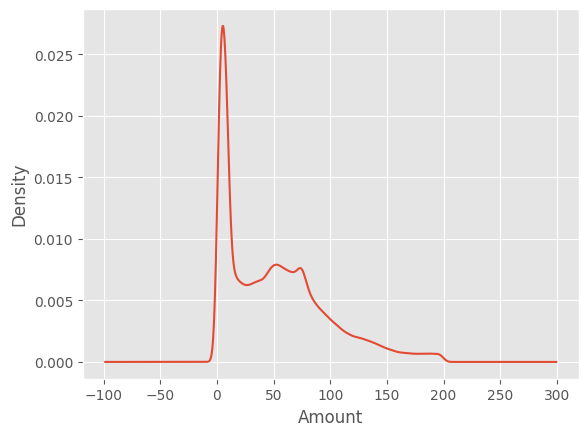

In [15]:
# The distribution of the amount has a peak and it looks bimodal
train_df[train_df['amt'] < 200]['amt'].plot(kind='kde')
plt.xlabel('Amount')

Text(0.5, 0, 'log of Amount')

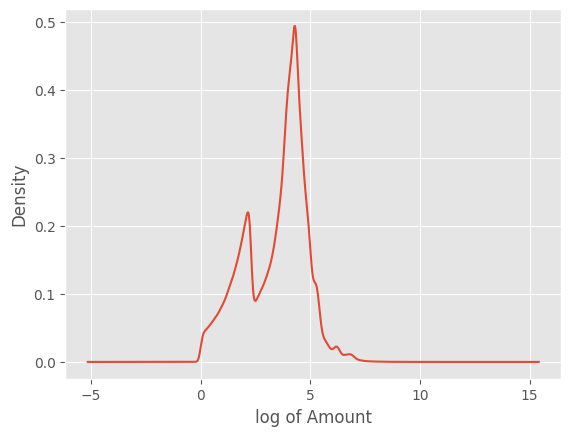

In [16]:
# Log transforming the column makes the impact of extreme outliers smaller
np.log(train_df['amt']).plot(kind='kde')
plt.xlabel('log of Amount')

Text(0.5, 0, 'City Population')

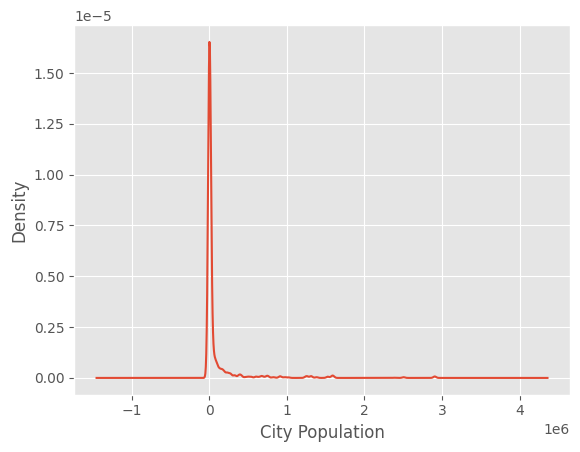

In [17]:
# Plot the distribution of the city_pop column
# This distribution also has some high outliers
train_df['city_pop'].plot(kind='kde')
plt.xlabel('City Population')

Text(0.5, 0, 'Log of City Population')

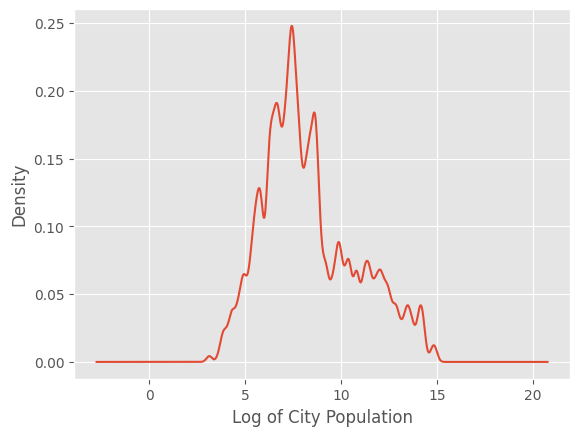

In [18]:
# Log transforming this column also makes the impact of extreme outliers smaller
np.log(train_df['city_pop']).plot(kind='kde')
plt.xlabel('Log of City Population')

#### Time-based distribution of fraud transactions

##### Hourly distribution

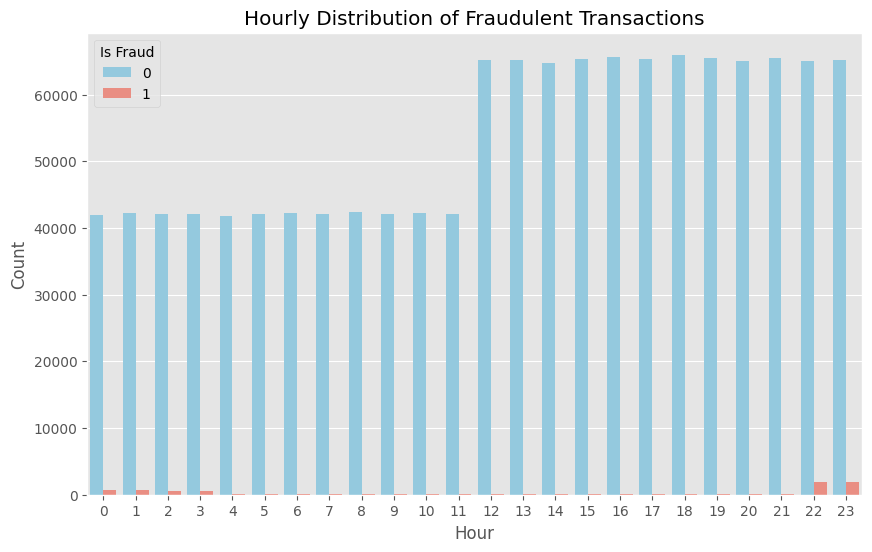

In [19]:
colors = ['skyblue', 'salmon']

train_df['trans_hour'] = pd.to_datetime(train_df['trans_date_trans_time']).dt.hour
train_df['trans_day'] = pd.to_datetime(train_df['trans_date_trans_time']).dt.dayofweek

# Plot hourly distribution of fraud
plt.figure(figsize=(10, 6))
sns.countplot(x='trans_hour', hue='is_fraud', data=train_df, palette = colors)
plt.title('Hourly Distribution of Fraudulent Transactions')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.legend(title='Is Fraud')
plt.show()

##### Day-wise Distribution

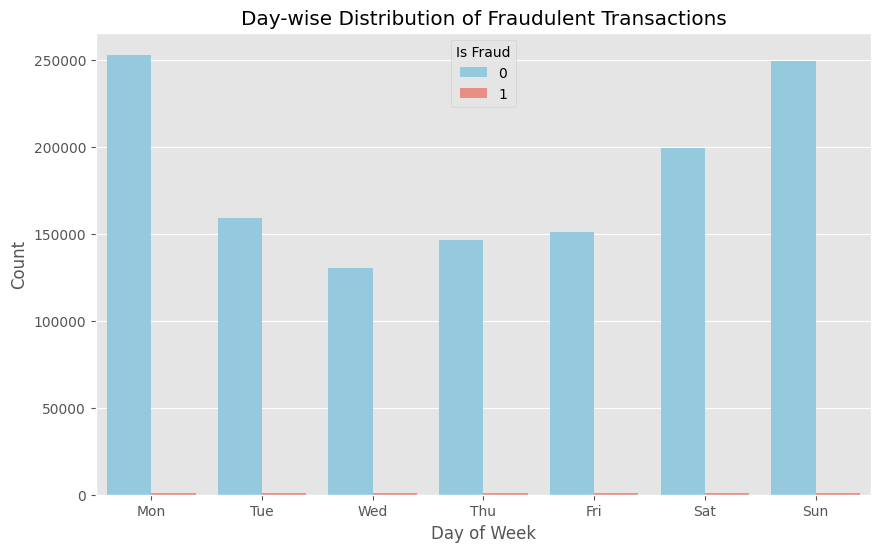

In [20]:
plt.figure(figsize=(10, 6))
sns.countplot(x='trans_day', hue='is_fraud', data=train_df, palette = colors)
plt.title('Day-wise Distribution of Fraudulent Transactions')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.legend(title='Is Fraud')
plt.show()

#### Top merchants having fraudulent transactions

In [21]:
fraud_counts = train_df.groupby('merchant')['is_fraud'].value_counts().unstack()
fraud_ratio = fraud_counts[1]*100 / fraud_counts[0]
fraud_ratio = fraud_ratio.replace([np.inf, np.nan], 0)
print(fraud_ratio.sort_values(ascending=False).head(10))

merchant
fraud_Kozey-Boehm                       2.640264
fraud_Herman, Treutel and Dickens       2.604578
fraud_Kerluke-Abshire                   2.281580
fraud_Brown PLC                         2.260870
fraud_Goyette Inc                       2.209363
fraud_Terry-Huel                        2.201741
fraud_Jast Ltd                          2.197802
fraud_Schmeler, Bashirian and Price     2.127660
fraud_Boyer-Reichert                    2.032086
fraud_Langworth, Boehm and Gulgowski    2.020725
dtype: float64


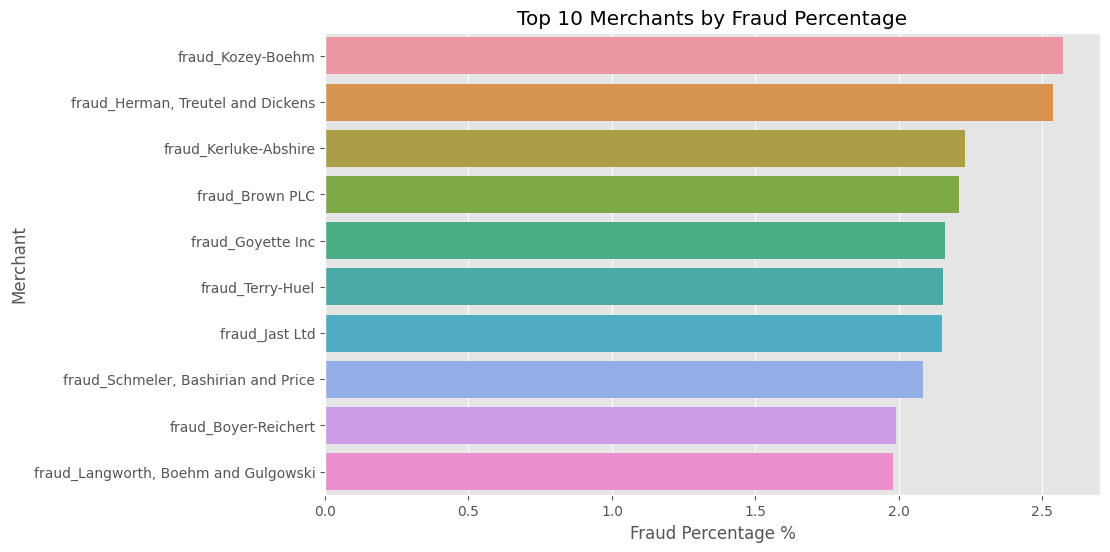

In [22]:
# Calculate the total number of transactions per merchant
total_counts = train_df['merchant'].value_counts()

# Calculate the number of fraudulent transactions per merchant
fraud_counts = train_df[train_df['is_fraud'] == 1]['merchant'].value_counts()

# Calculate the fraud percentage for each merchant
fraud_percentage = (fraud_counts / total_counts * 100).sort_values(ascending=False)

# Select the top 10 merchants
top10_fraud_percentage = fraud_percentage.head(10)

# Create a horizontal bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top10_fraud_percentage, y=top10_fraud_percentage.index)
plt.title('Top 10 Merchants by Fraud Percentage')
plt.xlabel('Fraud Percentage %')
plt.ylabel('Merchant')

# Display the plot
plt.show()

#### Transactions based on categories

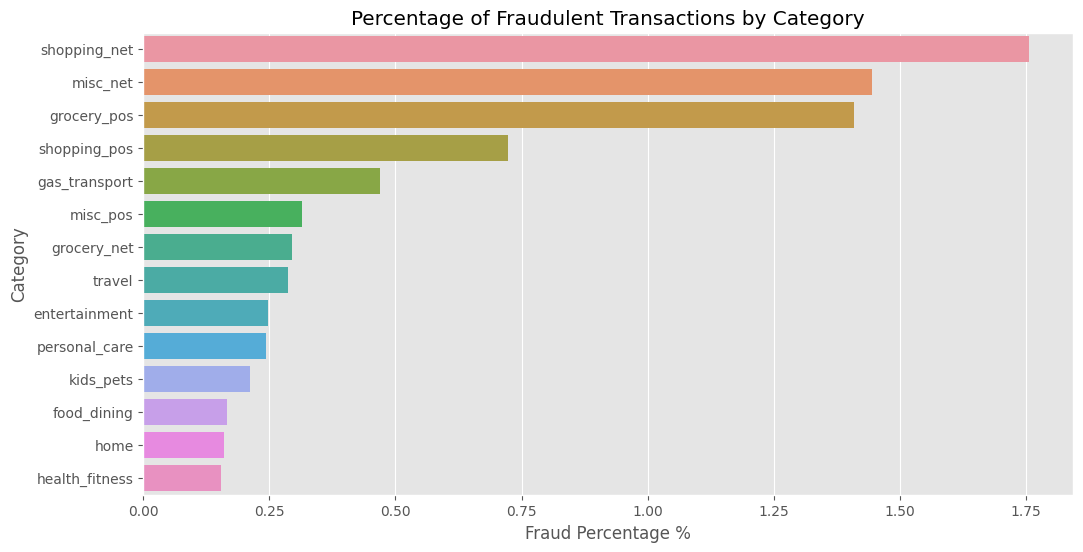

In [23]:
# Calculate the total number of transactions per category
total_counts = train_df['category'].value_counts()

# Calculate the number of fraudulent transactions per category
fraud_counts = train_df[train_df['is_fraud'] == 1]['category'].value_counts()

# Calculate the fraud percentage for each category
fraud_percentage = (fraud_counts / total_counts * 100).sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=fraud_percentage, y=fraud_percentage.index)
plt.title('Percentage of Fraudulent Transactions by Category')
plt.xlabel('Fraud Percentage %')
plt.ylabel('Category')

# Display the plot
plt.show()

#### Fraudulent transactions by amount

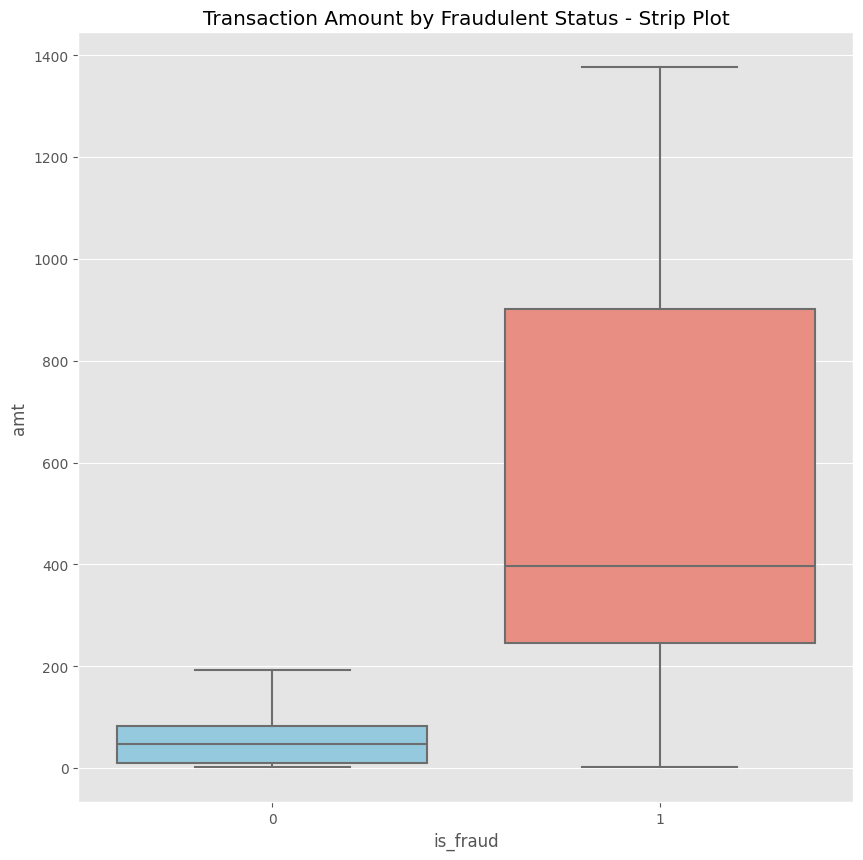

is_fraud
0     67.667110
1    531.320092
Name: amt, dtype: float64


In [24]:
plt.figure(figsize=(10, 10))
colors = ['skyblue', 'salmon']
sns.boxplot(x='is_fraud', y='amt', data=train_df, palette=colors, showfliers=False)
plt.title('Transaction Amount by Fraudulent Status - Strip Plot')
plt.show()
mean_amounts = train_df.groupby('is_fraud')['amt'].mean()
print(mean_amounts)

#### Fraudulent transactions by gender

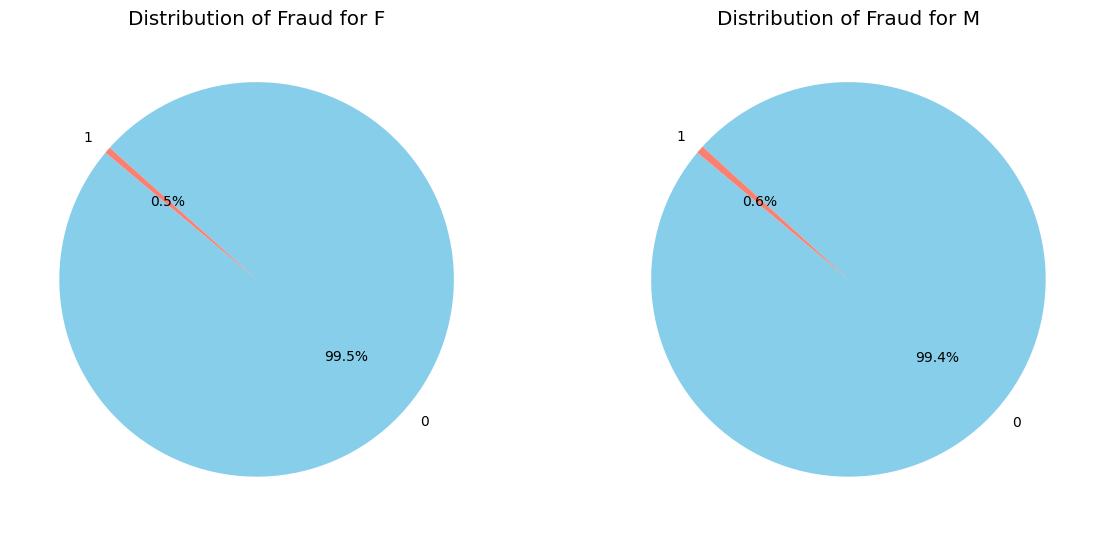

In [25]:
gender_fraud_distribution = train_df.groupby('gender')['is_fraud'].value_counts(normalize=True).unstack() * 100

# Plot pie charts
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Create a pie chart for each gender
for i, (gender, distribution) in enumerate(gender_fraud_distribution.iterrows()):
    axes[i].pie(distribution, labels=distribution.index, autopct='%1.1f%%', startangle=140, colors=colors)
    axes[i].set_title(f'Distribution of Fraud for {gender}')
    axes[i].set_ylabel('')  # We don't need a y-label here

# Display the figure
plt.show()

#### Fraudulent transactions based on geographical location

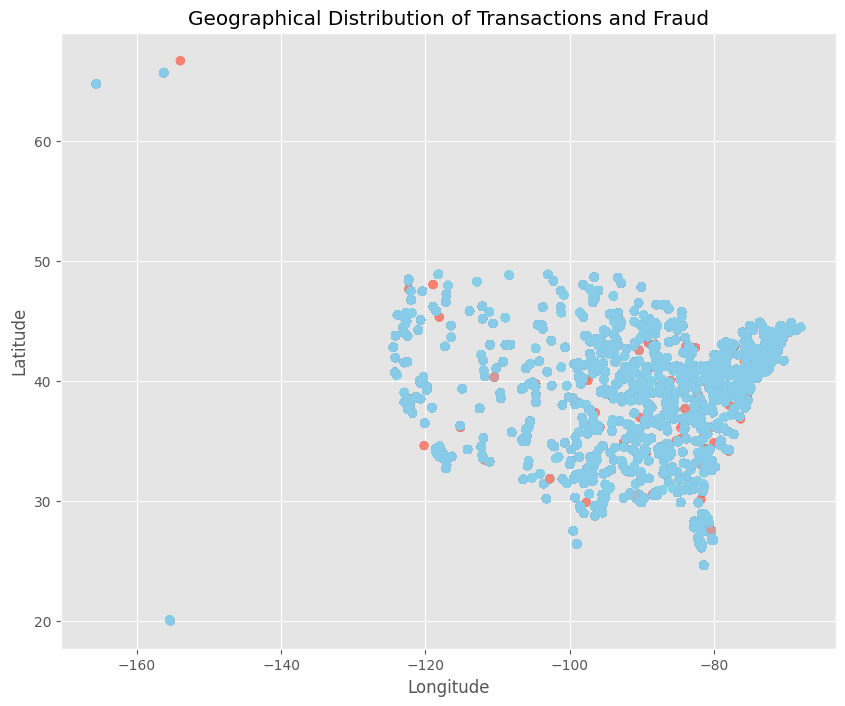

In [26]:
# Define the colors
colors = ['skyblue', 'salmon']  # non-fraudulent transactions will be blue, fraudulent will be red

# Create a colormap from the list of colors
cmap = mcolors.ListedColormap(colors)

# Now plot using this colormap
plt.figure(figsize=(10, 8))
scatter = plt.scatter(train_df['long'], train_df['lat'], c=train_df['is_fraud'], cmap=cmap, alpha=0.3)
plt.title('Geographical Distribution of Transactions and Fraud')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()


##### Fraud by State

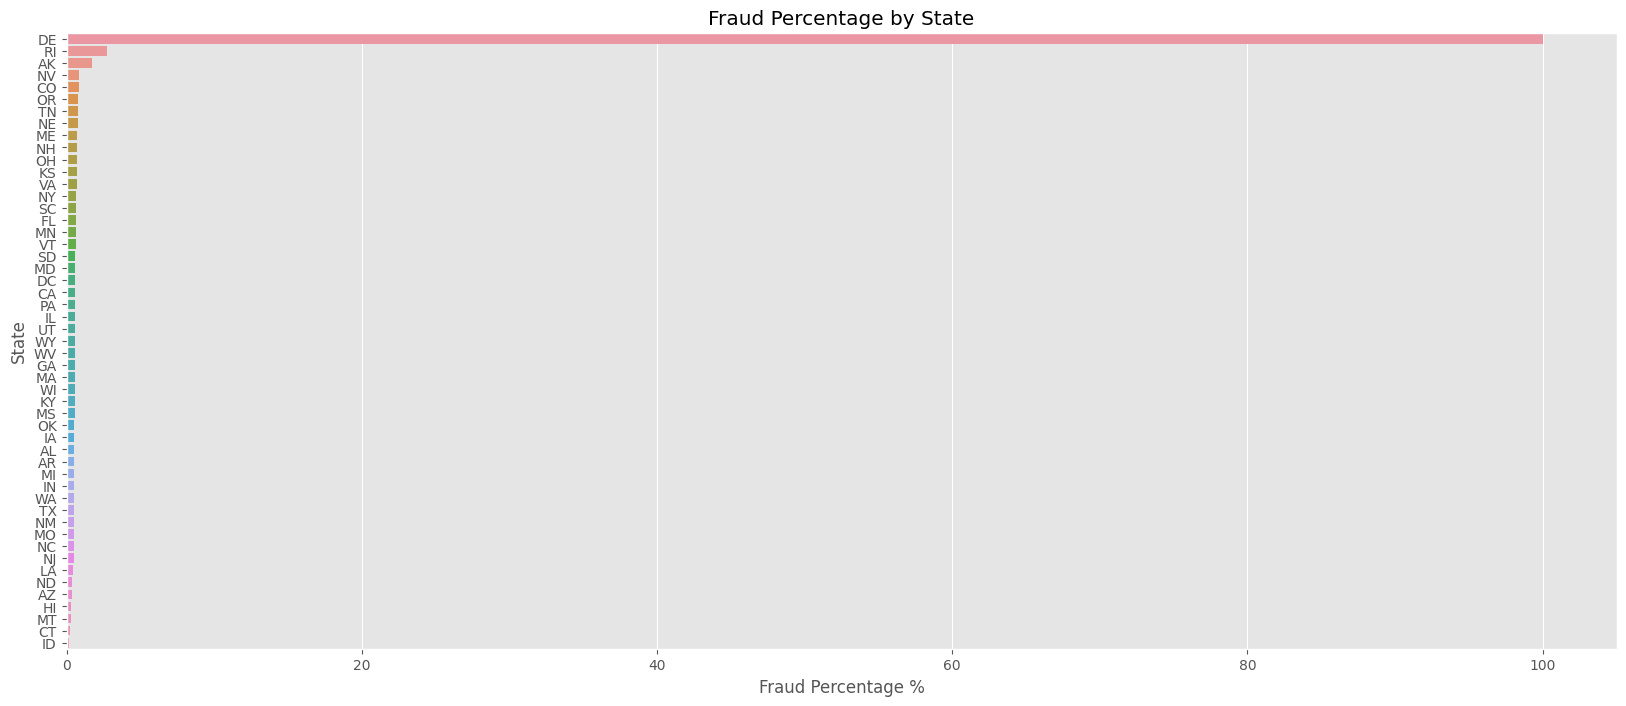

In [27]:
total_counts_by_state = train_df['state'].value_counts()

# Calculate the number of fraudulent transactions per state
fraud_counts_by_state = train_df[train_df['is_fraud'] == 1]['state'].value_counts()

# Calculate the fraud percentage for each state
fraud_percentage_by_state = (fraud_counts_by_state / total_counts_by_state * 100).sort_values(ascending=False)

# If you want to display this information, you can plot it
plt.figure(figsize=(20, 8))
sns.barplot(x=fraud_percentage_by_state, y=fraud_percentage_by_state.index)
plt.title('Fraud Percentage by State')
plt.xlabel('Fraud Percentage %')
plt.ylabel('State')

# Display the plot
plt.show()


##### Cities with highest fraud

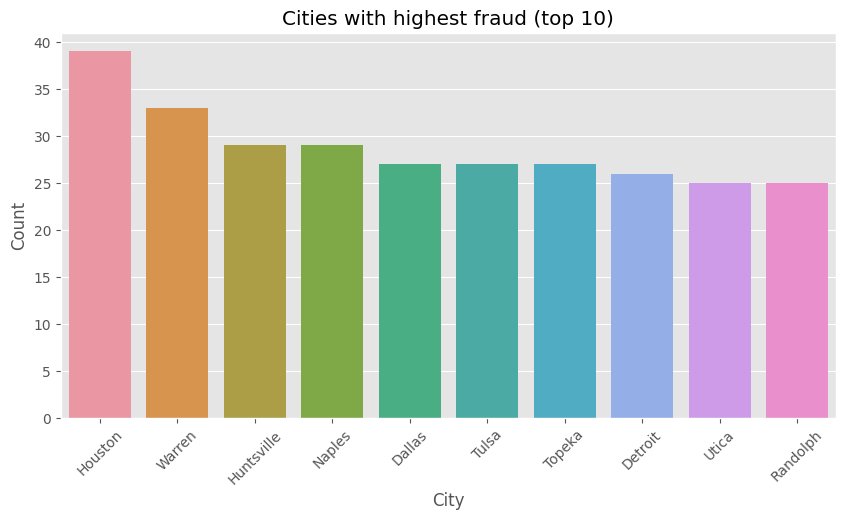

In [28]:
# Analysing cities with highest fraud
fraud_train_df = train_df[train_df['is_fraud']==1]
top_cities = fraud_train_df['city'].value_counts().head(10).index
top_city_data = fraud_train_df[fraud_train_df['city'].isin(top_cities)]

plt.figure(figsize=(10, 5))
sns.countplot(x='city', data=top_city_data, order=top_cities)
plt.ylabel('Count')
plt.xlabel('City')
plt.xticks(rotation=45)
plt.title('Cities with highest fraud (top 10)')
plt.show()


#### Interactive Heatmap for visualization

As it may not be visible on github in the notebook. The same is deployed on https://johri-lab.github.io/aml_final_project/

In [29]:
# Heatmap of fraudulent transactions
fraud_train_df_lat_long = fraud_train_df[['lat','long']]

m = folium.Map(location=[40, -98], zoom_start=5)
HeatMap(fraud_train_df_lat_long).add_to(m)
#m.save('fraud_heatmap.html') 
m

### Feature engineering
Some of the ideas were adapted from this notebook: https://www.kaggle.com/code/franciscosantos2/is-99-accuracy-good-maybe-not-credit-card-fraud#Hyperparameter-Tuning

In [30]:
# Store log columns as new features
train_df["log_amount"] = np.log(train_df["amt"])
train_df["log_city_pop"] = np.log(train_df["city_pop"])

In [31]:
train_df["log_amount"]

0          1.603420
1          4.674976
2          5.394127
3          3.806662
4          3.736717
             ...   
1296670    2.744704
1296671    3.945458
1296672    4.662778
1296673    4.316154
1296674    1.458615
Name: log_amount, Length: 1296675, dtype: float64

In [32]:
# Create age column from date of birth
train_df["age"] = 2023 - pd.to_datetime(train_df["dob"]).dt.year

In [33]:
# Create hour and month columns from the transaction datetime column
train_df["hour"] = pd.to_datetime(train_df["trans_date_trans_time"]).dt.hour
train_df["month"] = pd.to_datetime(train_df["trans_date_trans_time"]).dt.month

In [34]:
#### Combine latitude and longitude columns and bucketize them 
lat_bins = [15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70]
long_bins = [-170, -150, -130, -110, -90, -70, -50]

train_df['lat_binned'] = pd.cut(train_df['lat'], lat_bins)
train_df['long_binned'] = pd.cut(train_df['long'], long_bins)
train_df['merch_lat_binned'] = pd.cut(train_df['merch_lat'], lat_bins)
train_df['merch_long_binned'] = pd.cut(train_df['merch_long'], long_bins)

train_df["long_lat_binned"] = list(zip(train_df["lat_binned"], train_df["long_binned"]))
train_df["merch_long_lat_binned"] = list(zip(train_df["merch_lat_binned"], train_df["merch_long_binned"]))

In [35]:
# Encode high dimensional columns using target encoder
print(f"Unique categories for merchant: {len(train_df.merchant.unique())}")
print(f"Unique categories for city: {len(train_df.city.unique())}")
print(f"Unique categories for state: {len(train_df.state.unique())}")
print(f"Unique categories for zip: {len(train_df.zip.unique())}")
print(f"Unique categories for job: {len(train_df.job.unique())}")
print(f"Unique categories for long_lat_binned: {len(train_df.long_lat_binned.unique())}")
print(f"Unique categories for merch_long_lat_binned: {len(train_df.merch_long_lat_binned.unique())}")

high_dim_features = ["merchant", "category", "city", "state", "zip", "job", "long_lat_binned", "merch_long_lat_binned"]
train_df["zip"] = train_df.zip.astype("category")

target_variable = "is_fraud"
y = train_df[target_variable]

target_encoded_features = []
target_encoders = {}
for high_dim_feature in high_dim_features:
    target_encoder = ce.TargetEncoder()
    X = train_df[high_dim_feature]
    target_encoded_feature = high_dim_feature + "_target_encoded"
    target_encoded_features.append(target_encoded_feature)
    train_df[target_encoded_feature] = target_encoder.fit_transform(X, y)
    target_encoders[high_dim_feature] = target_encoder

Unique categories for merchant: 693
Unique categories for city: 894
Unique categories for state: 51
Unique categories for zip: 970
Unique categories for job: 494
Unique categories for long_lat_binned: 19
Unique categories for merch_long_lat_binned: 21


In [36]:
# Category and gender can be encoded using one-hot encoding
print(f"Unique categories for category: {len(train_df.category.unique())}")

ohe_features = ["category", "gender"]
# Encode lower dimensional categorical features using one-hot encoding
ohe = OneHotEncoder(handle_unknown="error", sparse=False)

ohe_encoded_X_train = pd.DataFrame(ohe.fit_transform(train_df[ohe_features]))
ohe_encoded_features = list(ohe.get_feature_names_out())
ohe_encoded_X_train.columns = ohe_encoded_features
train_df = pd.concat([train_df, ohe_encoded_X_train], axis=1)

Unique categories for category: 14


In [37]:
# Encode the frequency distribution of the credit card numbers
cc_num_frequency_counts = train_df["cc_num"].value_counts()
train_df["cc_num_frequency"] = train_df["cc_num"].map(cc_num_frequency_counts)

In [38]:
# Final features
features = ["log_amount", "log_city_pop", "age", "hour", "month", "cc_num_frequency"] + target_encoded_features + ohe_encoded_features

In [39]:
train_df[features].head()

,log_amount,log_city_pop,age,hour,month,cc_num_frequency,merchant_target_encoded,category_target_encoded,city_target_encoded,state_target_encoded,zip_target_encoded,job_target_encoded,long_lat_binned_target_encoded,merch_long_lat_binned_target_encoded,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_F,gender_M
0,1.603420,8.159089,35,0,1,2028,0.014207,0.014458,0.000000,0.004923,0.000000,0.001693,0.006305,0.006241,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,4.674976,5.003946,45,0,1,3030,0.010787,0.014098,0.000000,0.005073,0.000000,0.002157,0.004842,0.004815,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,5.394127,8.331827,61,0,1,503,0.002111,0.002478,0.000000,0.001984,0.000000,0.015656,0.007495,0.007366,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,3.806662,7.569928,56,0,1,493,0.003444,0.004694,0.030426,0.002722,0.030426,0.007905,0.004842,0.004815,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,3.736717,4.595120,37,0,1,2017,0.003769,0.003139,0.000000,0.006769,0.000000,0.000000,0.006305,0.006241,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


Apply the transformations to the test set

In [40]:
test_df = pd.read_csv("fraudTest.csv")

In [41]:
# Apply the same transformations on the test set
test_df["log_amount"] = np.log(test_df["amt"])
test_df["log_city_pop"] = np.log(test_df["city_pop"])
test_df["age"] = 2023 - pd.to_datetime(test_df["dob"]).dt.year
test_df["hour"] = pd.to_datetime(test_df["trans_date_trans_time"]).dt.hour
test_df["month"] = pd.to_datetime(test_df["trans_date_trans_time"]).dt.month

test_df['lat_binned'] = pd.cut(test_df['lat'], lat_bins)
test_df['long_binned'] = pd.cut(test_df['long'], long_bins)
test_df['merch_lat_binned'] = pd.cut(test_df['merch_lat'], lat_bins)
test_df['merch_long_binned'] = pd.cut(test_df['merch_long'], long_bins)
test_df["long_lat_binned"] = list(zip(test_df["lat_binned"], test_df["long_binned"]))
test_df["merch_long_lat_binned"] = list(zip(test_df["merch_lat_binned"], test_df["merch_long_binned"]))

y = test_df[target_variable]
for high_dim_feature, target_encoded_feature in zip(high_dim_features, target_encoded_features):
    X = test_df[high_dim_feature]
    target_encoder = target_encoders[high_dim_feature]
    test_df[target_encoded_feature] = target_encoder.transform(X, y)

ohe_encoded_X_test = pd.DataFrame(ohe.transform(test_df[ohe_features]))
ohe_encoded_X_test.columns = ohe_encoded_features
test_df = pd.concat([test_df, ohe_encoded_X_test], axis=1)


test_df["cc_num_frequency"] = test_df["cc_num"].map(cc_num_frequency_counts)
# Indicate new credit card numbers in the test data by setting their frequency to -1
test_df["cc_num_frequency"].fillna(-1, inplace=True)

Create the final development and test sets

In [42]:
# Select features and target
X_dev = train_df[features]
X_test = test_df[features]
y_dev = train_df[target_variable]
y_test = test_df[target_variable]

In [43]:
X_dev.shape

(1296675, 30)

In [44]:
X_test.shape

(555719, 30)

### EDA post feature engineering

In [45]:
train_df[["log_amount", "log_city_pop", "age", "hour", "month", "cc_num_frequency", "job_target_encoded", "city_target_encoded", "state_target_encoded"]].describe().T

,count,mean,std,min,25%,50%,75%,max
log_amount,1296675.0,3.457514,1.387861,0.000000,2.266958,3.861151,4.420526,10.273287
log_city_pop,1296675.0,8.360216,2.453511,3.135494,6.610696,7.806289,9.919755,14.882529
age,1296675.0,49.742545,17.378485,18.000000,36.000000,48.000000,61.000000,99.000000
hour,1296675.0,12.804858,6.817824,0.000000,7.000000,14.000000,19.000000,23.000000
month,1296675.0,6.142150,3.417703,1.000000,3.000000,6.000000,9.000000,12.000000
cc_num_frequency,1296675.0,1818.725328,742.505681,7.000000,1466.000000,2000.000000,2524.000000,3123.000000
job_target_encoded,1296675.0,0.005680,0.005698,0.000000,0.003003,0.005133,0.007417,0.478060
city_target_encoded,1296675.0,0.005471,0.007845,0.000000,0.001929,0.004624,0.007229,0.478060
state_target_encoded,1296675.0,0.005783,0.001365,0.001984,0.005149,0.005693,0.006585,0.254083


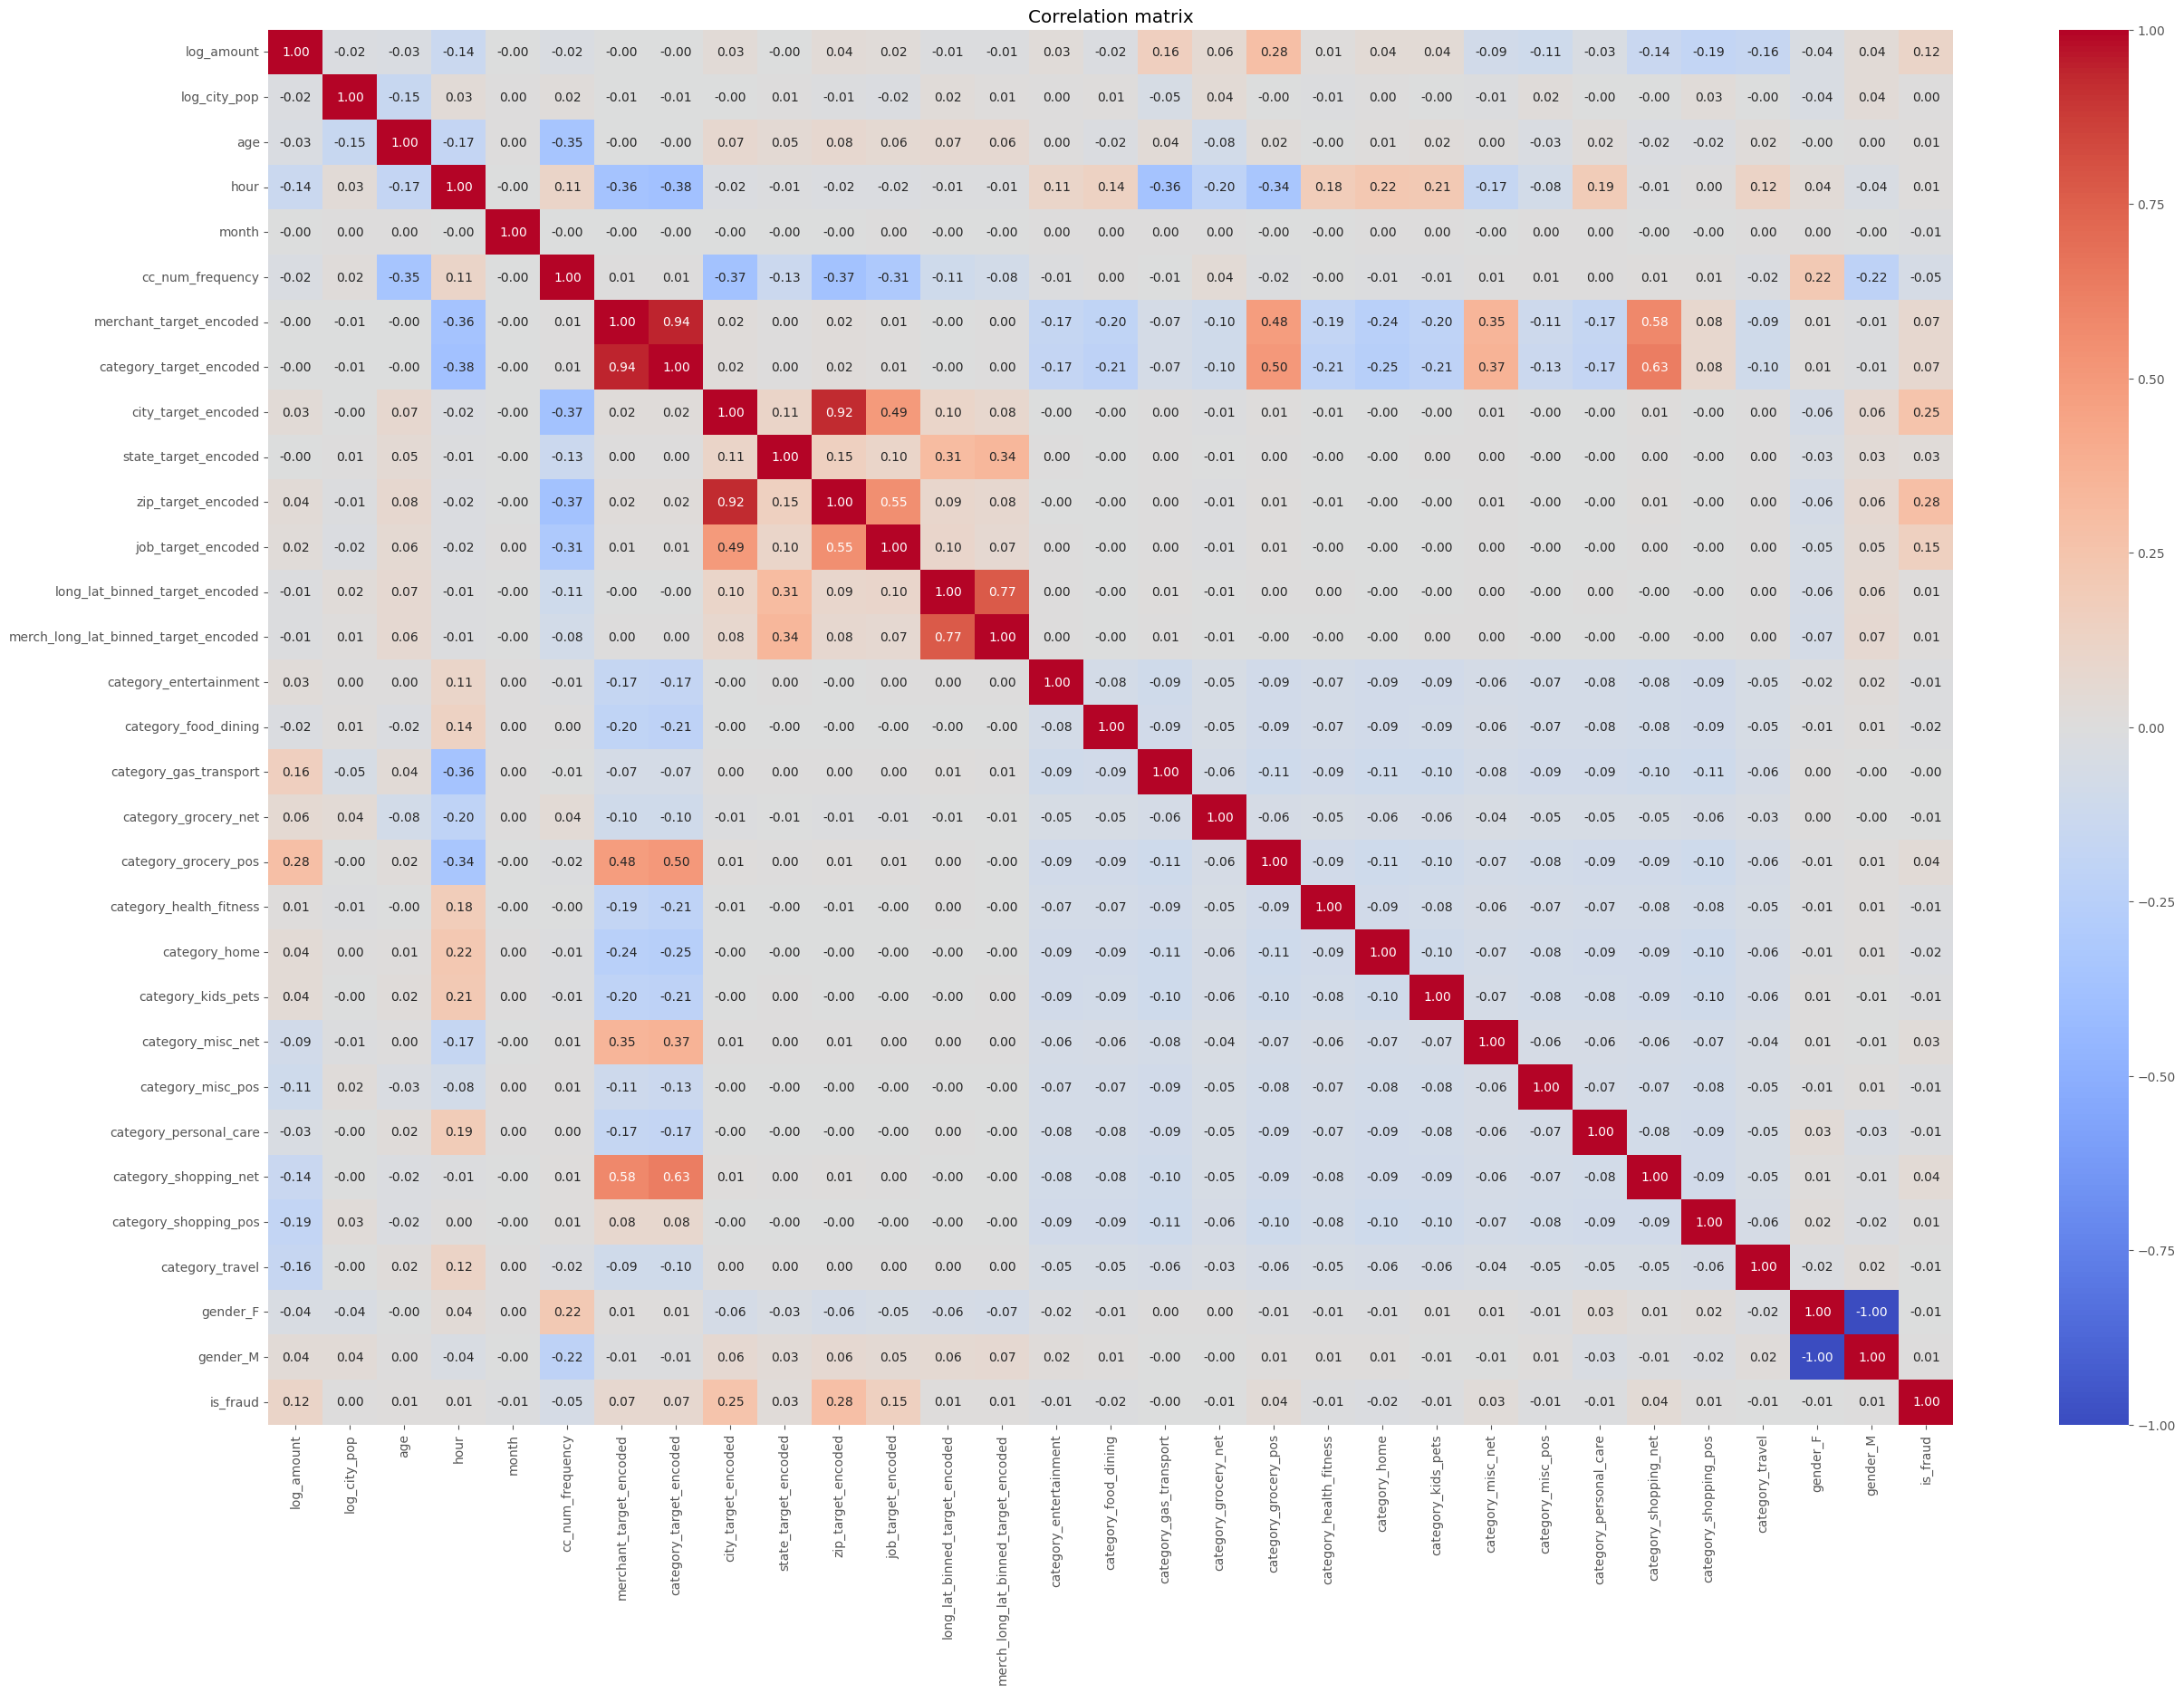

In [46]:
# Correlation plot comparing final features
plt.figure(figsize=(30,20))
correlation_matrix = train_df[features+['is_fraud']].corr()
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Correlation matrix")  
plt.show()

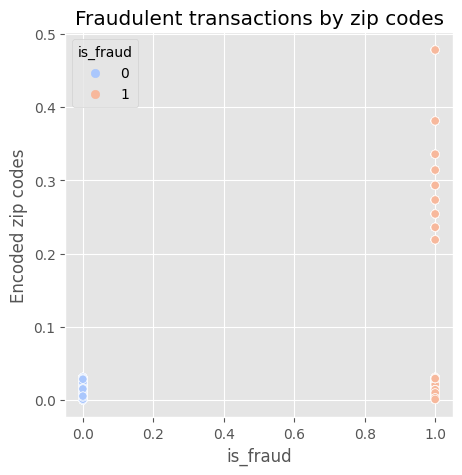

In [47]:
# Scatter plot based on the correlation scores of the columns
plt.figure(figsize=(5, 5))
sns.scatterplot(x='is_fraud', y='zip_target_encoded', data=train_df, hue='is_fraud', palette='coolwarm')
plt.title('Fraudulent transactions by zip codes')
plt.xlabel('is_fraud')
plt.ylabel('Encoded zip codes')
plt.show()

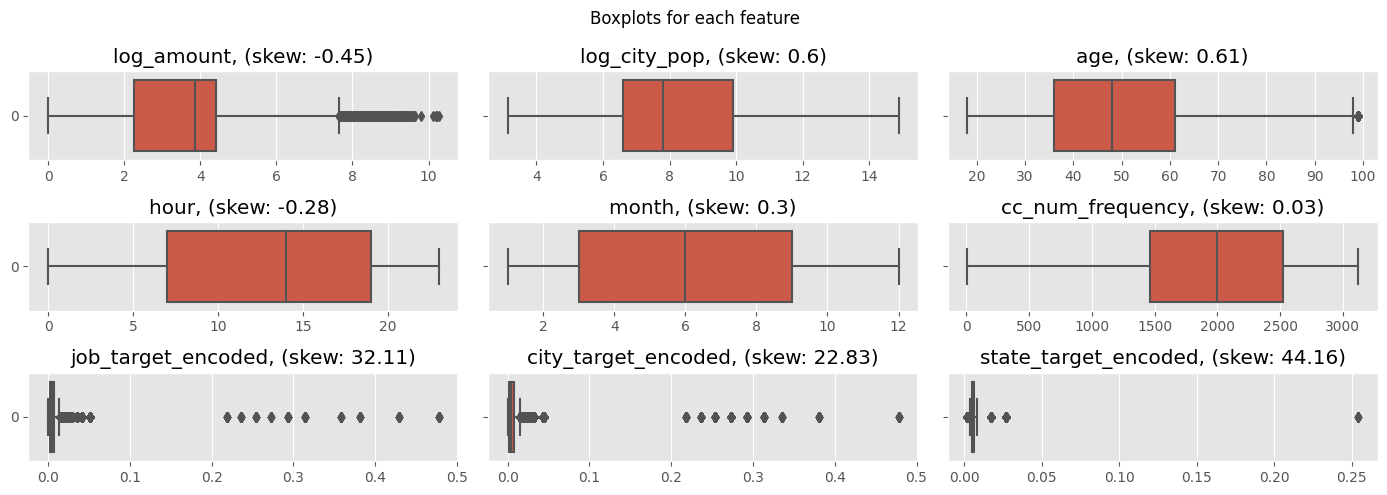

In [48]:
# Boxplot and it's skewness
selected_ft = ["log_amount", "log_city_pop", "age", "hour", "month", "cc_num_frequency", "job_target_encoded", "city_target_encoded", "state_target_encoded"]
fig, axs = plt.subplots(3, 3, sharey=True, figsize=(14, 5))
fig.suptitle('Boxplots for each feature')
axs = axs.flatten()

for i, data in enumerate(selected_ft):
    sns.boxplot(data=train_df[data], orient='h', ax=axs[i])
    axs[i].set_title(data + ', (skew: ' + str(round(train_df[data].skew(axis=0, skipna=True), 2))+")")

plt.tight_layout()
plt.show()

# Baseline Modeling

In [49]:
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

In [50]:
oversampler = RandomOverSampler(random_state=42)
X_dev_oversampled, y_dev_oversampled = oversampler.fit_resample(X_dev, y_dev)

smote_sampler = SMOTE(random_state=42)
X_dev_smote, y_dev_smote = smote_sampler.fit_resample(X_dev, y_dev)

undersampler = RandomUnderSampler(random_state=42)
X_dev_undersampled, y_dev_undersampled = undersampler.fit_resample(X_dev, y_dev)

adasyn_sampler = ADASYN(random_state=42)
X_dev_adasyn, y_dev_adasyn = adasyn_sampler.fit_resample(X_dev, y_dev)

In [51]:
def test_baseline_models(X_train, X_test, y_train, y_test):

    models_info = []
    col_names = ['Model', 'Training accuracy', 'Test Accuracy', 'Precision', 'Recall', 'F1 Score','ROC Score']
    model_name = 'Decision Tree'
    trained_model = DecisionTreeClassifier(random_state=42)
    trained_model.fit(X_train, y_train)
    train_acc = trained_model.score(X_train, y_train)
    test_acc = trained_model.score(X_test, y_test)
    y_pred = trained_model.predict(X_test)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    y_proba = trained_model.predict_proba(X_test)[:,1]
    roc = roc_auc_score(y_test, y_proba)
    models_info.append([model_name, train_acc, test_acc, precision, recall, f1, roc])
    
    return trained_model,pd.DataFrame(models_info, columns=col_names)


In [52]:
baseModel, baseResults = test_baseline_models(X_dev, X_test, y_dev, y_test)
print("\nDecision Tree Model\n", baseResults)

undersampledModel, undersampledResults = test_baseline_models(X_dev_undersampled, X_test, y_dev_undersampled, y_test)
print("\nDecision Tree Model (undersampled)\n", undersampledResults)

overersampledModel, overersampledResults = test_baseline_models(X_dev_oversampled, X_test, y_dev_oversampled, y_test)
print("\nDecision Tree Model (overersampled)\n", overersampledResults)

smoteModel, smoteResults = test_baseline_models(X_dev_smote, X_test, y_dev_smote, y_test)
print("\nDecision Tree Model (smote)\n", smoteResults)

adasynModel, adasynResults = test_baseline_models(X_dev_adasyn, X_test, y_dev_adasyn, y_test)
print("\nDecision Tree Model (adasyn)\n", adasynResults)



Decision Tree Model
            Model  Training accuracy  Test Accuracy  Precision    Recall  \
0  Decision Tree                1.0       0.996185   0.511171  0.266667   

   F1 Score  ROC Score  
0   0.35049   0.632839  

Decision Tree Model (undersampled)
            Model  Training accuracy  Test Accuracy  Precision    Recall  \
0  Decision Tree                1.0       0.970735   0.016507  0.112354   

   F1 Score  ROC Score  
0  0.028785   0.543208  

Decision Tree Model (overersampled)
            Model  Training accuracy  Test Accuracy  Precision    Recall  \
0  Decision Tree                1.0       0.995757   0.322795  0.090443   

   F1 Score  ROC Score  
0  0.141296   0.544854  

Decision Tree Model (smote)
            Model  Training accuracy  Test Accuracy  Precision    Recall  \
0  Decision Tree                1.0       0.995314   0.237113  0.096503   

   F1 Score  ROC Score  
0  0.137177    0.54765  

Decision Tree Model (adasyn)
            Model  Training accuracy  T

#### Feature Importance with Decision Tree 

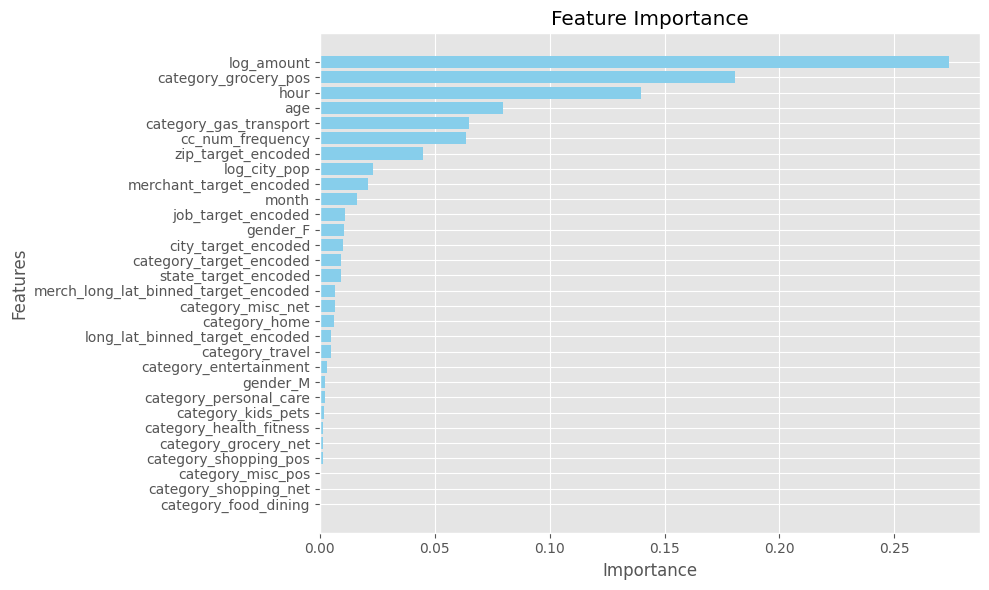

In [53]:
# Feature Importance Scores (we use the base model as it shows the best accuracy)
feature_importance = baseModel.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_dev.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.gca().invert_yaxis() 
plt.tight_layout()
plt.show()

#### Feature impact analysis using SHAP- with importance of each class

In [54]:
import shap
# Using SHAP for model interpretation
explainer = shap.TreeExplainer(baseModel)
shap_values = explainer.shap_values(X_dev)

Text(0.5, 1.0, 'Impact of each feature and class on overall predictions')

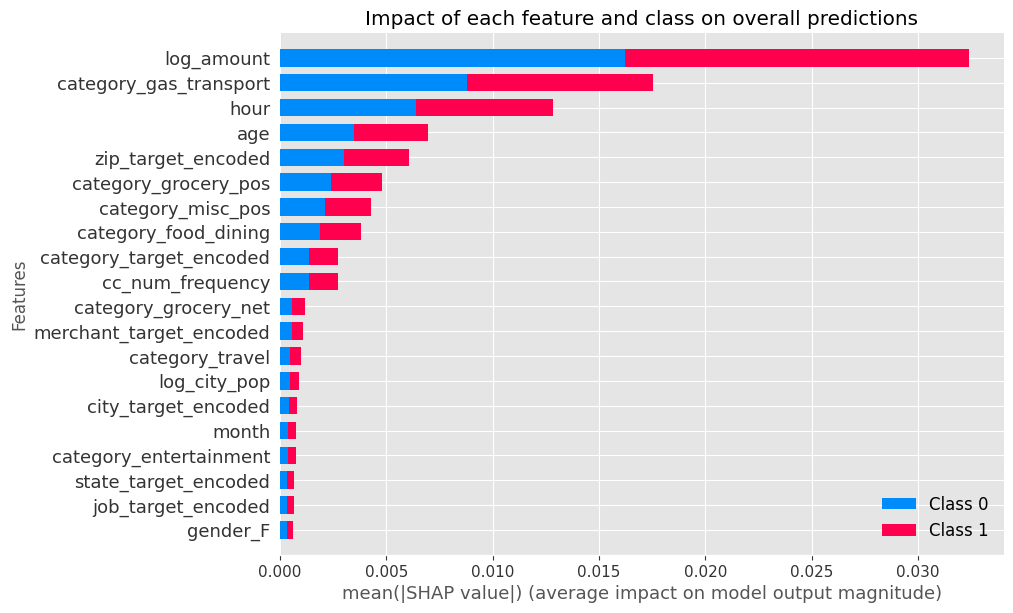

In [55]:
shap.summary_plot(shap_values, X_dev, show=False, plot_size=(10, 6))
plt.ylabel("Features")
plt.title("Impact of each feature and class on overall predictions")

# Using Pycaret - AutoML Approach

In [ ]:
from pycaret.classification import *

### AutoML with no sampling

In [ ]:
X_dev['target'] = y_dev

In [ ]:
pycaret_setup = setup(data = X_dev, target = 'target', session_id=123)

,Description,Value
0,Session id,123
1,Target,target
2,Target type,Binary
3,Original data shape,"(1296675, 31)"
4,Transformed data shape,"(1296675, 31)"
5,Transformed train set shape,"(907672, 31)"
6,Transformed test set shape,"(389003, 31)"
7,Numeric features,30
8,Preprocess,True
9,Imputation type,simple


In [ ]:
train_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9989,0.9990,0.8474,0.9488,0.8951,0.8946,0.8961,3.6860
rf,Random Forest Classifier,0.9984,0.9856,0.7484,0.9750,0.8467,0.8459,0.8534,40.7970
et,Extra Trees Classifier,0.9980,0.9820,0.6745,0.9834,0.8001,0.7991,0.8136,36.7850
dt,Decision Tree Classifier,0.9979,0.9145,0.8300,0.8157,0.8228,0.8217,0.8218,2.4320
gbc,Gradient Boosting Classifier,0.9977,0.9858,0.7158,0.8650,0.7832,0.7821,0.7857,68.0830
lightgbm,Light Gradient Boosting Machine,0.9968,0.9156,0.7406,0.7232,0.7309,0.7293,0.7298,2.8970
ada,Ada Boost Classifier,0.9962,0.9902,0.4852,0.7773,0.5968,0.5950,0.6121,22.7360
knn,K Neighbors Classifier,0.9959,0.8410,0.3373,0.8724,0.4861,0.4844,0.5407,343.0110
lr,Logistic Regression,0.9950,0.8518,0.1707,0.8426,0.2836,0.2822,0.3776,47.1780
ridge,Ridge Classifier,0.9948,0.0000,0.0954,1.0000,0.1740,0.1731,0.3076,0.9430


In [ ]:
best_model = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9989,0.9990,0.8403,0.9609,0.8966,0.8960,0.8980
1,0.9989,0.9993,0.8517,0.9532,0.8996,0.8990,0.9005
2,0.9989,0.9995,0.8457,0.9590,0.8988,0.8982,0.9000
3,0.9989,0.9990,0.8629,0.9379,0.8988,0.8982,0.8990
4,0.9988,0.9990,0.8533,0.9314,0.8907,0.8900,0.8909
5,0.9988,0.9991,0.8533,0.9353,0.8924,0.8918,0.8928
6,0.9988,0.9989,0.8476,0.9468,0.8945,0.8939,0.8953
7,0.9989,0.9986,0.8419,0.9609,0.8975,0.8969,0.8989
8,0.9989,0.9987,0.8441,0.9569,0.8970,0.8964,0.8982


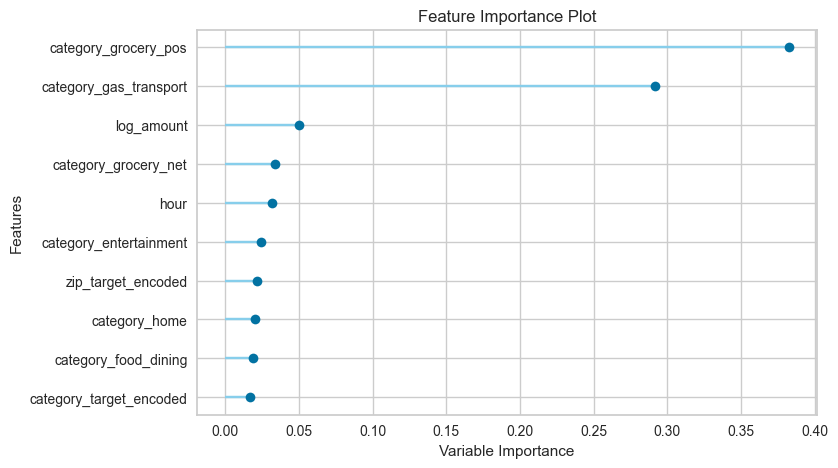

In [ ]:
plot_model(best_model, plot='feature')

In [ ]:
xgb_tuned = tune_model(best_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9986,0.9990,0.9049,0.8623,0.8831,0.8824,0.8827
1,0.9986,0.9993,0.9068,0.8579,0.8817,0.8810,0.8813
2,0.9985,0.9994,0.9143,0.8421,0.8767,0.8760,0.8767
3,0.9985,0.9991,0.9105,0.8401,0.8739,0.8731,0.8738
4,0.9983,0.9984,0.9086,0.8238,0.8641,0.8633,0.8643
5,0.9984,0.9989,0.9067,0.8366,0.8702,0.8694,0.8701
6,0.9986,0.9990,0.9124,0.8523,0.8813,0.8806,0.8811
7,0.9985,0.9979,0.8876,0.8630,0.8751,0.8744,0.8745
8,0.9984,0.9990,0.9068,0.8354,0.8696,0.8689,0.8696


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


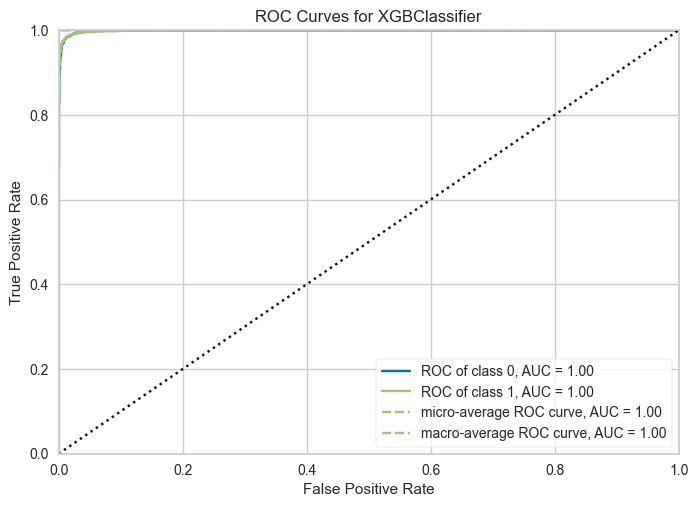

In [ ]:
plot_model(xgb_tuned, plot = 'auc')

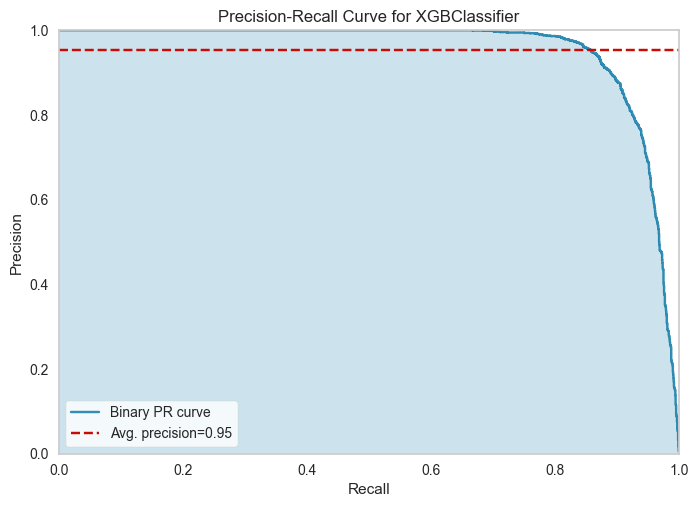

In [ ]:
plot_model(xgb_tuned, plot = 'pr')

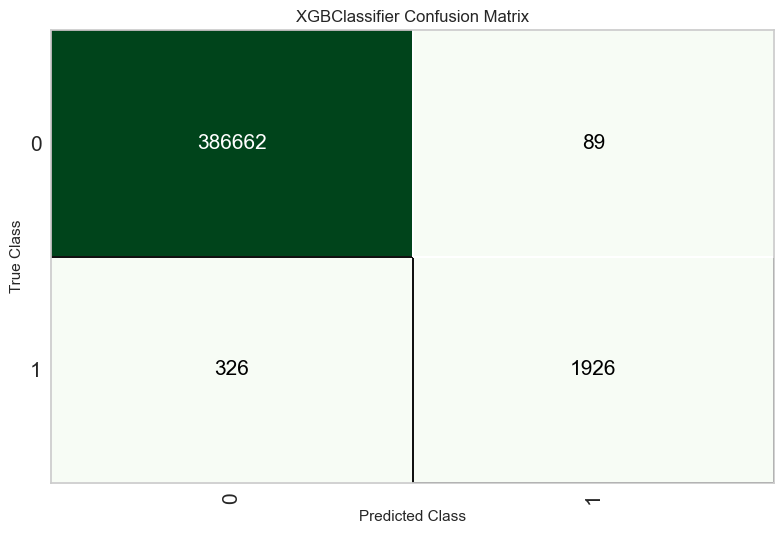

In [ ]:
plot_model(xgb_tuned, plot = 'confusion_matrix')

In [ ]:
predict_model(xgb_tuned);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.9989,0.9989,0.8552,0.9558,0.9027,0.9022,0.9036


In [ ]:
final_rf = finalize_model(xgb_tuned)

In [ ]:
X_test['target'] = y_test

In [ ]:
unseen_predictions = predict_model(final_rf, data=X_test)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.9963,0.9071,0.0862,0.6187,0.1514,0.1506,0.2301


### AutoML with Undersampling

In [ ]:
print(test_baseline_models(X_dev_undersampled, X_test, y_dev_undersampled, y_test))

           Model  Training accuracy  Test Accuracy  Precision    Recall  \
0  Decision Tree                1.0       0.970735   0.016507  0.112354   

   F1 Score  ROC Score  
0  0.028785   0.543208  


In [ ]:
X_dev_undersampled['target'] = y_dev_undersampled

In [ ]:
pycaret_setup = setup(data = X_dev_undersampled, target = 'target', session_id=123)

,Description,Value
0,Session id,123
1,Target,target
2,Target type,Binary
3,Original data shape,"(15012, 31)"
4,Transformed data shape,"(15012, 31)"
5,Transformed train set shape,"(10508, 31)"
6,Transformed test set shape,"(4504, 31)"
7,Numeric features,30
8,Preprocess,True
9,Imputation type,simple


In [ ]:
train_model = compare_models(exclude= ['knn','svm'])

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,19:22:27
Status,. . . . . . . . . . . . . . . . . .,Loading Estimator
Estimator,. . . . . . . . . . . . . . . . . .,Logistic Regression


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9836,0.9985,0.9840,0.9833,0.9836,0.9673,0.9673,0.1690
xgboost,Extreme Gradient Boosting,0.9821,0.9984,0.9823,0.9820,0.9821,0.9642,0.9643,0.2100
rf,Random Forest Classifier,0.9719,0.9961,0.9680,0.9757,0.9718,0.9439,0.9439,0.1490
et,Extra Trees Classifier,0.9706,0.9949,0.9583,0.9825,0.9702,0.9412,0.9416,0.0960
gbc,Gradient Boosting Classifier,0.9687,0.9954,0.9644,0.9728,0.9685,0.9374,0.9375,0.2530
dt,Decision Tree Classifier,0.9676,0.9676,0.9682,0.9672,0.9677,0.9353,0.9353,0.0270
ada,Ada Boost Classifier,0.9523,0.9900,0.9452,0.9590,0.9520,0.9046,0.9049,0.0890
lda,Linear Discriminant Analysis,0.7823,0.8742,0.7649,0.7924,0.7783,0.5645,0.5651,0.0270
lr,Logistic Regression,0.7818,0.8697,0.7705,0.7883,0.7791,0.5636,0.5639,1.0620
ridge,Ridge Classifier,0.7813,0.0000,0.7657,0.7904,0.7777,0.5626,0.5630,0.0290


In [ ]:
best_model = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9819,0.9985,0.9924,0.9721,0.9821,0.9638,0.9641
1,0.9857,0.9977,0.9848,0.9867,0.9857,0.9715,0.9715
2,0.9791,0.9983,0.9791,0.9791,0.9791,0.9581,0.9581
3,0.9810,0.9982,0.9810,0.9810,0.9810,0.9619,0.9619
4,0.9876,0.9984,0.9905,0.9848,0.9877,0.9753,0.9753
5,0.9829,0.9990,0.9790,0.9866,0.9828,0.9657,0.9658
6,0.9905,0.9997,0.9886,0.9924,0.9905,0.9810,0.9810
7,0.9772,0.9977,0.9848,0.9700,0.9773,0.9543,0.9544
8,0.9876,0.9995,0.9867,0.9885,0.9876,0.9752,0.9752


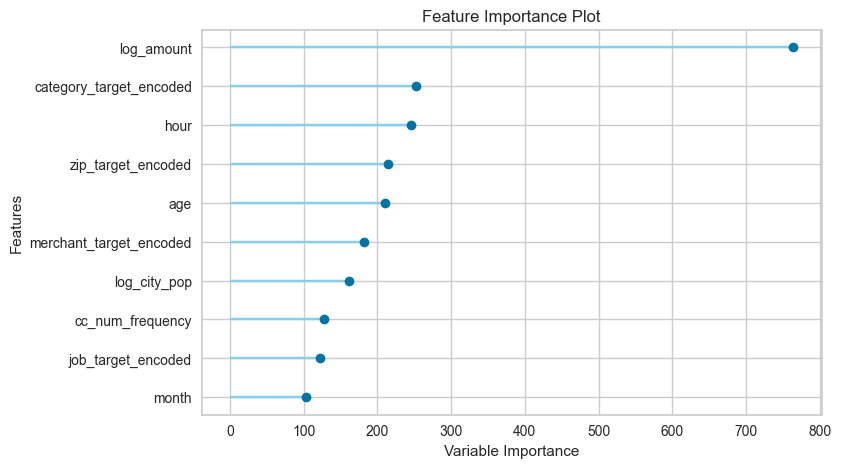

In [ ]:
plot_model(best_model, plot='feature')

In [ ]:
lgbm_tuned = tune_model(best_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9810,0.9976,0.9886,0.9738,0.9811,0.9619,0.9621
1,0.9724,0.9972,0.9715,0.9733,0.9724,0.9448,0.9448
2,0.9734,0.9975,0.9715,0.9752,0.9733,0.9467,0.9467
3,0.9753,0.9978,0.9715,0.9789,0.9752,0.9505,0.9506
4,0.9791,0.9977,0.9810,0.9772,0.9791,0.9581,0.9581
5,0.9753,0.9981,0.9657,0.9845,0.9750,0.9505,0.9507
6,0.9876,0.9992,0.9867,0.9885,0.9876,0.9753,0.9753
7,0.9715,0.9965,0.9752,0.9679,0.9715,0.9429,0.9429
8,0.9886,0.9992,0.9867,0.9904,0.9885,0.9771,0.9771


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


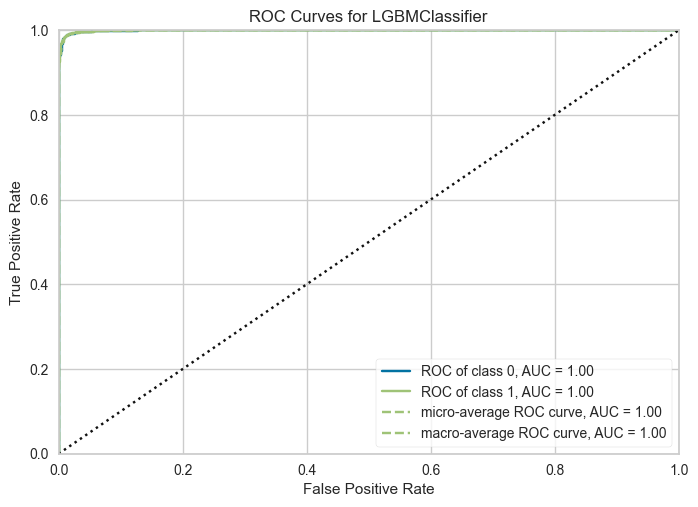

In [ ]:
plot_model(lgbm_tuned, plot = 'auc')

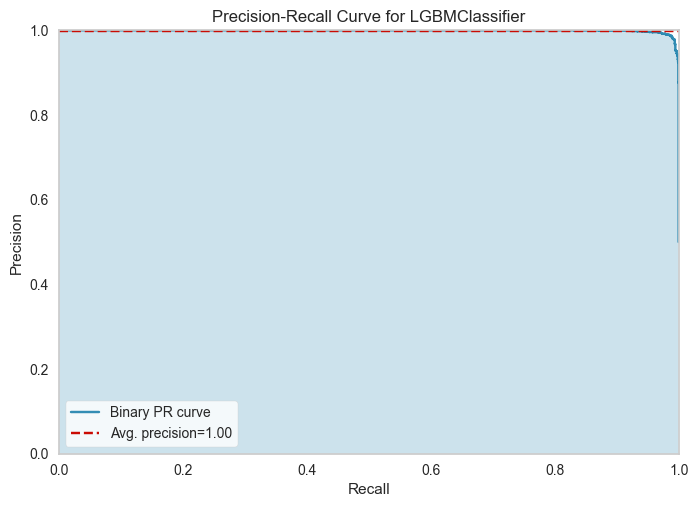

In [ ]:
plot_model(lgbm_tuned, plot = 'pr')

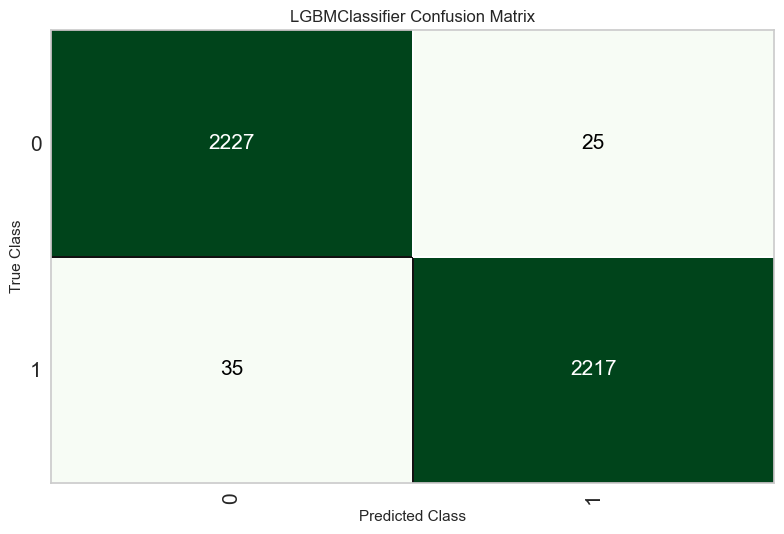

In [ ]:
plot_model(lgbm_tuned, plot = 'confusion_matrix')

In [ ]:
predict_model(lgbm_tuned);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9867,0.9991,0.9845,0.9888,0.9866,0.9734,0.9734


In [ ]:
final_rf = finalize_model(lgbm_tuned)

In [ ]:
X_test['target'] = y_test

In [ ]:
unseen_predictions = predict_model(final_rf, data=X_test)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9792,0.8476,0.1040,0.0226,0.0371,0.0310,0.0406


### AutoML with Oversampling

In [ ]:
X_dev_oversampled['target'] = y_dev_oversampled 

In [ ]:
pycaret_setup = setup(data = X_dev_oversampled, target = 'target', session_id=123)

,Description,Value
0,Session id,123
1,Target,target
2,Target type,Binary
3,Original data shape,"(2578338, 31)"
4,Transformed data shape,"(2578338, 31)"
5,Transformed train set shape,"(1804836, 31)"
6,Transformed test set shape,"(773502, 31)"
7,Numeric features,30
8,Preprocess,True
9,Imputation type,simple


In [ ]:
train_model = compare_models(exclude= ['knn','svm','lda','lr','ridge','qda','nb','dummy'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9999,1.0000,1.0000,0.9999,0.9999,0.9999,0.9999,80.7450
rf,Random Forest Classifier,0.9998,1.0000,1.0000,0.9997,0.9998,0.9997,0.9997,108.5970
dt,Decision Tree Classifier,0.9994,0.9994,1.0000,0.9988,0.9994,0.9988,0.9988,8.8960
xgboost,Extreme Gradient Boosting,0.9973,0.9999,1.0000,0.9947,0.9973,0.9947,0.9947,9.4070
lightgbm,Light Gradient Boosting Machine,0.9935,0.9996,0.9983,0.9889,0.9936,0.9871,0.9871,9.5710
gbc,Gradient Boosting Classifier,0.9715,0.9962,0.9694,0.9736,0.9715,0.9431,0.9431,159.8900
ada,Ada Boost Classifier,0.9570,0.9917,0.9521,0.9615,0.9568,0.9140,0.9140,39.4400


In [ ]:
best_model = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9994,0.9994,1.0000,0.9987,0.9994,0.9987,0.9987
1,0.9996,0.9996,1.0000,0.9991,0.9996,0.9991,0.9991
2,0.9995,0.9995,1.0000,0.9989,0.9995,0.9989,0.9989
3,0.9994,0.9994,1.0000,0.9987,0.9994,0.9987,0.9987
4,0.9994,0.9994,1.0000,0.9988,0.9994,0.9988,0.9988
5,0.9996,0.9996,1.0000,0.9991,0.9996,0.9991,0.9991
6,0.9993,0.9993,1.0000,0.9986,0.9993,0.9986,0.9986
7,0.9993,0.9993,1.0000,0.9986,0.9993,0.9986,0.9986
8,0.9994,0.9994,1.0000,0.9987,0.9994,0.9987,0.9987


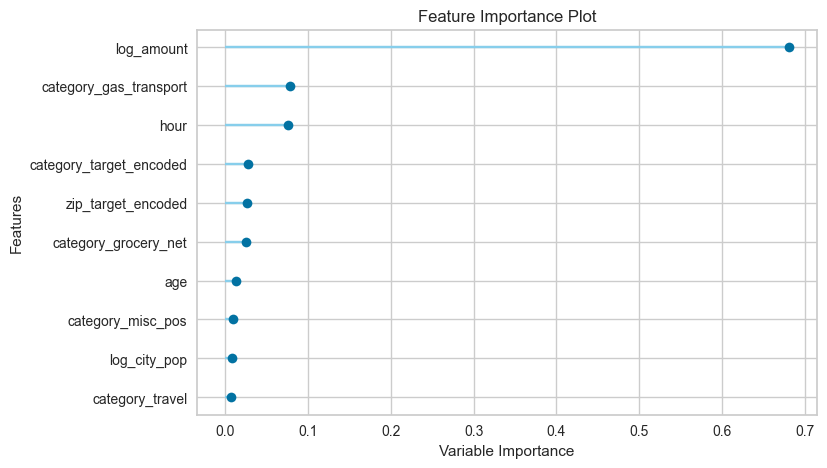

In [ ]:
plot_model(best_model, plot='feature')

In [ ]:
dt_tuned = tune_model(best_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9770,0.9964,0.9888,0.9660,0.9773,0.9540,0.9543
1,0.9702,0.9958,0.9825,0.9588,0.9705,0.9403,0.9406
2,0.9692,0.9929,0.9841,0.9557,0.9697,0.9384,0.9389
3,0.9719,0.9957,0.9866,0.9583,0.9723,0.9437,0.9441
4,0.9784,0.9974,0.9836,0.9735,0.9785,0.9567,0.9568
5,0.9805,0.9976,0.9841,0.9771,0.9806,0.9610,0.9610
6,0.9768,0.9957,0.9903,0.9643,0.9771,0.9537,0.9540
7,0.9807,0.9963,0.9860,0.9755,0.9808,0.9613,0.9614
8,0.9750,0.9969,0.9827,0.9678,0.9752,0.9500,0.9501


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


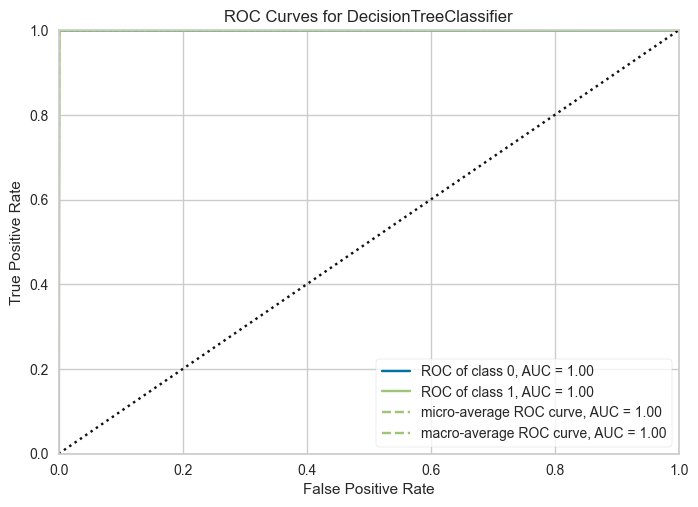

In [ ]:
plot_model(dt_tuned, plot = 'auc')

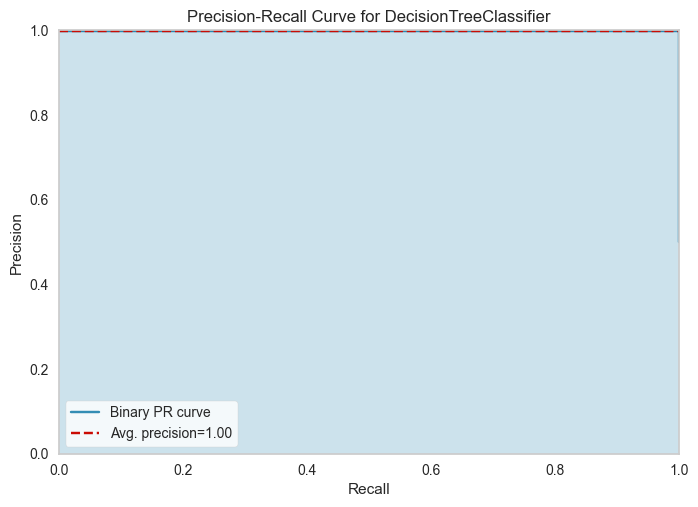

In [ ]:
plot_model(dt_tuned, plot = 'pr')

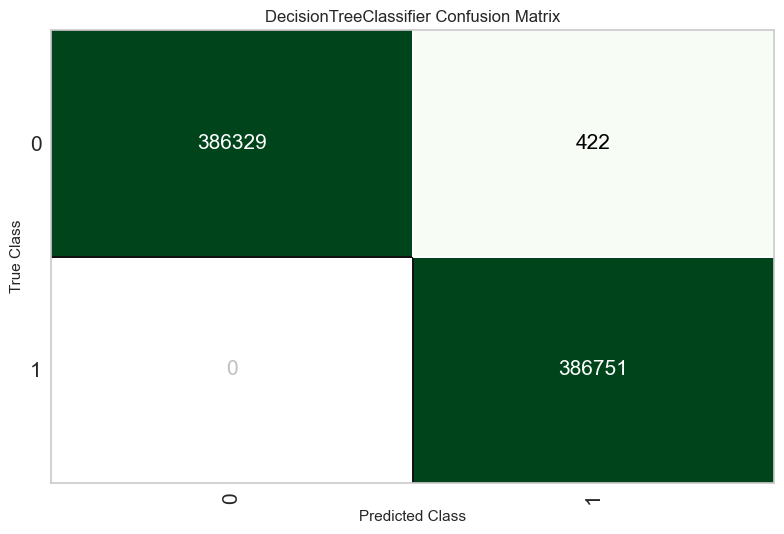

In [ ]:
plot_model(dt_tuned, plot = 'confusion_matrix')

In [ ]:
predict_model(dt_tuned);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.9995,0.9995,1.0000,0.9989,0.9995,0.9989,0.9989


In [ ]:
final_dt = finalize_model(dt_tuned)

In [ ]:
X_test['target'] = y_test

In [ ]:
unseen_predictions = predict_model(final_dt, data=X_test)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.9958,0.5446,0.0900,0.3238,0.1408,0.1394,0.1691


### AutoML with SMOTE

In [ ]:
X_dev_smote['target'] = y_dev_smote

In [ ]:
pycaret_setup = setup(data = X_dev_smote, target = 'target', session_id=123)

,Description,Value
0,Session id,123
1,Target,target
2,Target type,Binary
3,Original data shape,"(2578338, 31)"
4,Transformed data shape,"(2578338, 31)"
5,Transformed train set shape,"(1804836, 31)"
6,Transformed test set shape,"(773502, 31)"
7,Numeric features,30
8,Preprocess,True
9,Imputation type,simple


In [ ]:
train_model = compare_models(include= ['dt','xgboost','lightgbm'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.9988,0.9988,0.9991,0.9985,0.9988,0.9975,0.9975,9.5030
xgboost,Extreme Gradient Boosting,0.9988,1.0000,0.9990,0.9986,0.9988,0.9976,0.9976,12.6240
lightgbm,Light Gradient Boosting Machine,0.9973,1.0000,0.9974,0.9973,0.9973,0.9947,0.9947,11.8130


In [ ]:
best_model = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9989,1.0000,0.9990,0.9987,0.9989,0.9977,0.9977
1,0.9990,1.0000,0.9991,0.9989,0.9990,0.9980,0.9980
2,0.9988,1.0000,0.9990,0.9986,0.9988,0.9976,0.9976
3,0.9987,1.0000,0.9990,0.9985,0.9987,0.9975,0.9975
4,0.9988,1.0000,0.9989,0.9987,0.9988,0.9975,0.9975
5,0.9988,1.0000,0.9990,0.9986,0.9988,0.9976,0.9976
6,0.9985,1.0000,0.9987,0.9983,0.9985,0.9970,0.9970
7,0.9988,1.0000,0.9990,0.9986,0.9988,0.9976,0.9976
8,0.9990,1.0000,0.9991,0.9988,0.9990,0.9979,0.9979


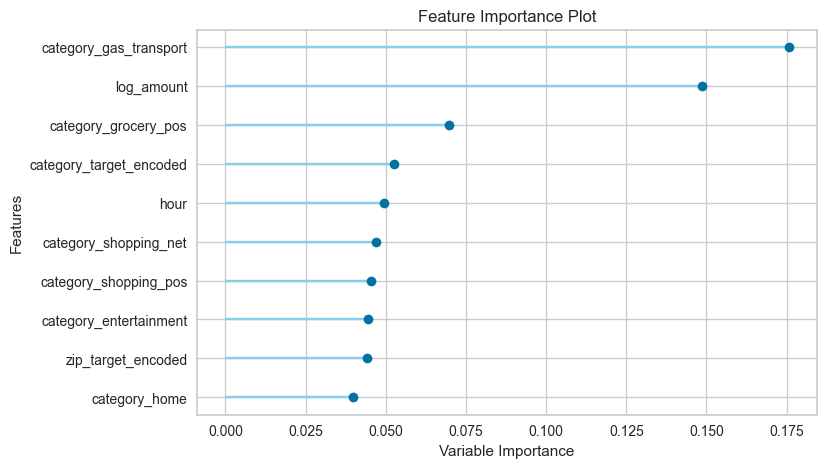

In [ ]:
plot_model(best_model, plot='feature')

In [ ]:
xgb_tuned = tune_model(best_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9987,1.0000,0.9998,0.9977,0.9987,0.9975,0.9975
1,0.9988,1.0000,0.9998,0.9978,0.9988,0.9977,0.9977
2,0.9987,1.0000,0.9998,0.9975,0.9987,0.9973,0.9973
3,0.9985,1.0000,0.9999,0.9972,0.9985,0.9971,0.9971
4,0.9987,1.0000,0.9998,0.9977,0.9987,0.9975,0.9975
5,0.9988,1.0000,0.9998,0.9977,0.9988,0.9975,0.9975
6,0.9984,1.0000,0.9998,0.9969,0.9984,0.9967,0.9967
7,0.9986,1.0000,0.9998,0.9975,0.9986,0.9973,0.9973
8,0.9987,1.0000,0.9999,0.9975,0.9987,0.9974,0.9974


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


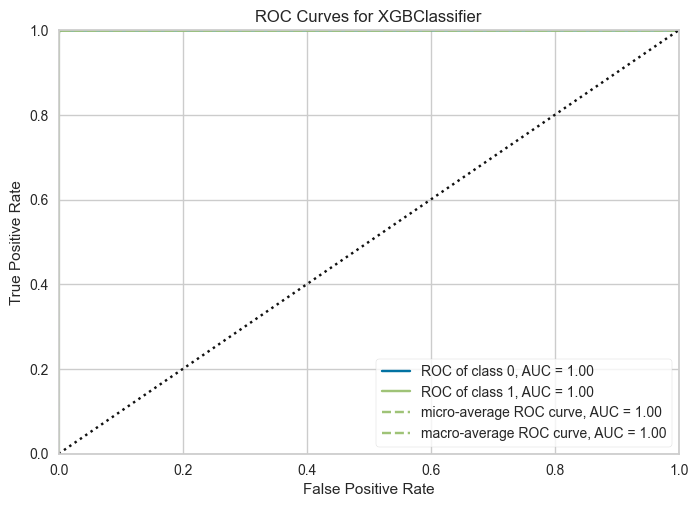

In [ ]:
plot_model(xgb_tuned, plot = 'auc')

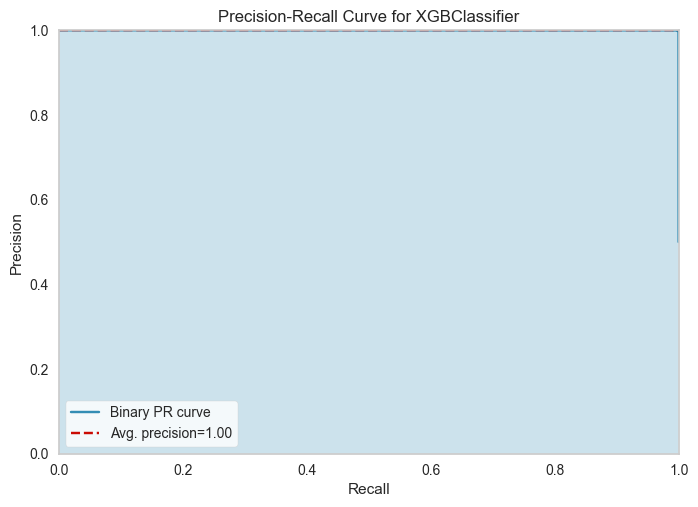

In [ ]:
plot_model(xgb_tuned, plot = 'pr')

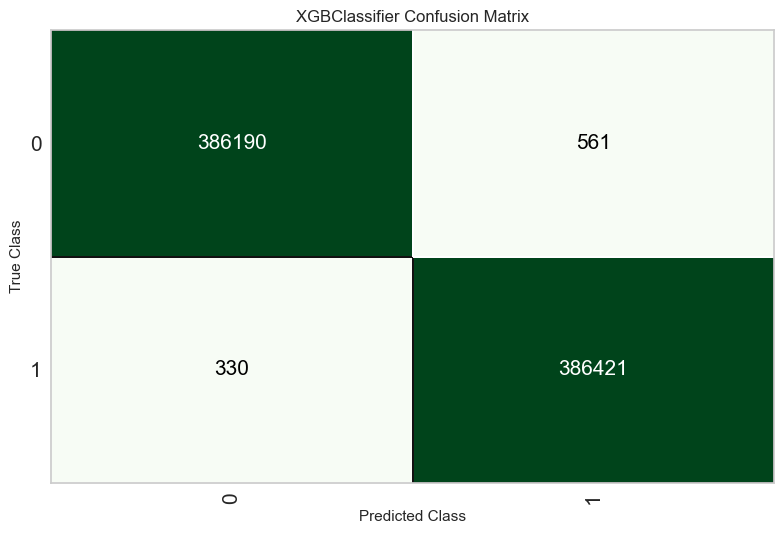

In [ ]:
plot_model(xgb_tuned, plot = 'confusion_matrix')

In [ ]:
predict_model(xgb_tuned);



,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.9988,1.0000,0.9991,0.9986,0.9988,0.9977,0.9977


In [ ]:
final_xgb = finalize_model(xgb_tuned)

In [ ]:
X_test['target'] = y_test

In [ ]:
unseen_predictions = predict_model(final_xgb, data=X_test)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.9961,0.9333,0.2294,0.4781,0.3100,0.3083,0.3294


### AutoML for ADASYN

In [ ]:
X_dev_adasyn['target'] = y_dev_adasyn

In [ ]:
pycaret_setup = setup(data = X_dev_adasyn, target = 'target', session_id=123)

,Description,Value
0,Session id,123
1,Target,target
2,Target type,Binary
3,Original data shape,"(2577682, 31)"
4,Transformed data shape,"(2577682, 31)"
5,Transformed train set shape,"(1804377, 31)"
6,Transformed test set shape,"(773305, 31)"
7,Numeric features,30
8,Preprocess,True
9,Imputation type,simple


In [ ]:
train_model = compare_models(include= ['dt','xgboost','lightgbm'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.9988,0.9988,0.9991,0.9985,0.9988,0.9976,0.9976,8.9170
xgboost,Extreme Gradient Boosting,0.9987,1.0000,0.9991,0.9984,0.9987,0.9974,0.9974,8.0330
lightgbm,Light Gradient Boosting Machine,0.9972,0.9999,0.9979,0.9966,0.9972,0.9945,0.9945,9.1680


In [ ]:
best_model = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9988,1.0000,0.9991,0.9984,0.9988,0.9975,0.9975
1,0.9988,1.0000,0.9990,0.9986,0.9988,0.9976,0.9976
2,0.9987,1.0000,0.9992,0.9983,0.9987,0.9974,0.9974
3,0.9987,1.0000,0.9990,0.9983,0.9987,0.9973,0.9973
4,0.9987,1.0000,0.9991,0.9983,0.9987,0.9975,0.9975
5,0.9988,1.0000,0.9990,0.9985,0.9988,0.9975,0.9975
6,0.9986,1.0000,0.9991,0.9981,0.9986,0.9972,0.9972
7,0.9986,1.0000,0.9990,0.9982,0.9986,0.9973,0.9973
8,0.9989,1.0000,0.9992,0.9985,0.9989,0.9977,0.9978


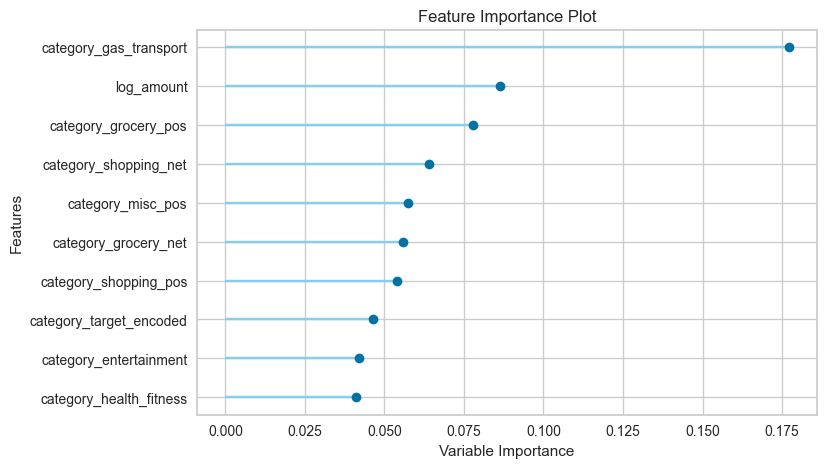

In [ ]:
plot_model(best_model, plot='feature')

In [ ]:
xgb_tuned = tune_model(best_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9987,1.0000,0.9998,0.9976,0.9987,0.9975,0.9975
1,0.9987,1.0000,0.9999,0.9975,0.9987,0.9974,0.9974
2,0.9986,1.0000,0.9998,0.9973,0.9986,0.9971,0.9971
3,0.9986,1.0000,0.9998,0.9974,0.9986,0.9972,0.9972
4,0.9986,1.0000,0.9999,0.9974,0.9986,0.9973,0.9973
5,0.9987,1.0000,0.9998,0.9975,0.9987,0.9973,0.9973
6,0.9984,1.0000,0.9999,0.9969,0.9984,0.9968,0.9968
7,0.9986,1.0000,0.9998,0.9973,0.9986,0.9971,0.9971
8,0.9986,1.0000,0.9999,0.9972,0.9986,0.9972,0.9972


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


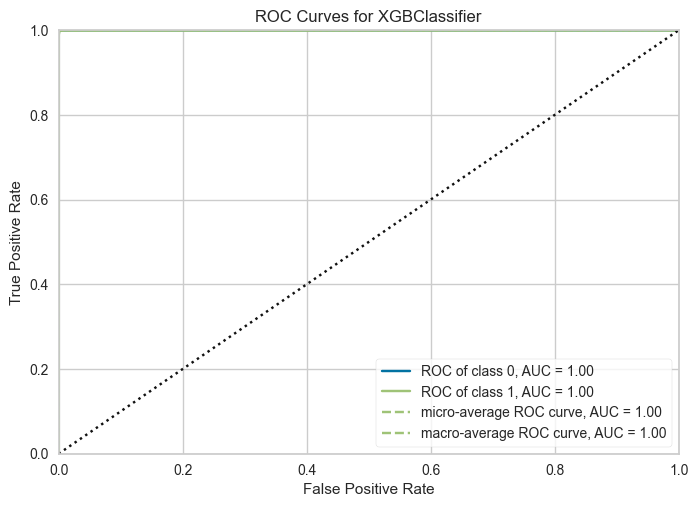

In [ ]:
plot_model(xgb_tuned, plot = 'auc')

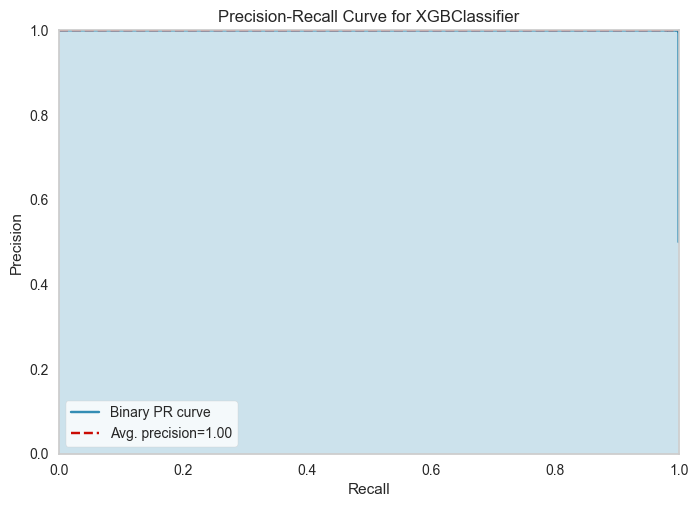

In [ ]:
plot_model(xgb_tuned, plot = 'pr')

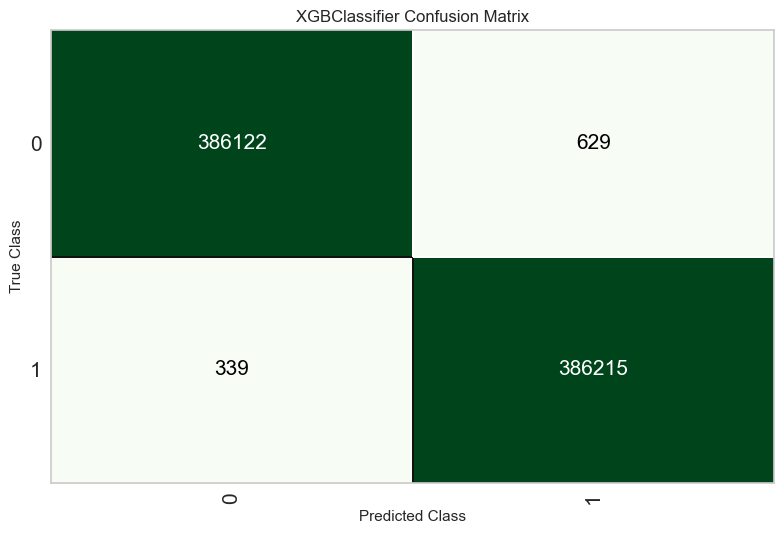

In [ ]:
plot_model(xgb_tuned, plot = 'confusion_matrix')

In [ ]:
predict_model(xgb_tuned);


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.9987,1.0000,0.9991,0.9984,0.9987,0.9975,0.9975


In [ ]:
final_xgb = finalize_model(xgb_tuned)

In [ ]:
X_test['target'] = y_test

In [ ]:
unseen_predictions = predict_model(final_xgb, data=X_test)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.9958,0.9256,0.2205,0.4160,0.2882,0.2863,0.3010
